- 作业1. False news the spread of true and false news online. The analysis code is freely available at https://goo.gl/forms/AKIlZujpexhN7fY33. The entire data set is also available, from the same link.

- 作业2（选做，非必选）. Henry Farber's (2015) study of the behavior of New York City taxi drivers
 https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page 

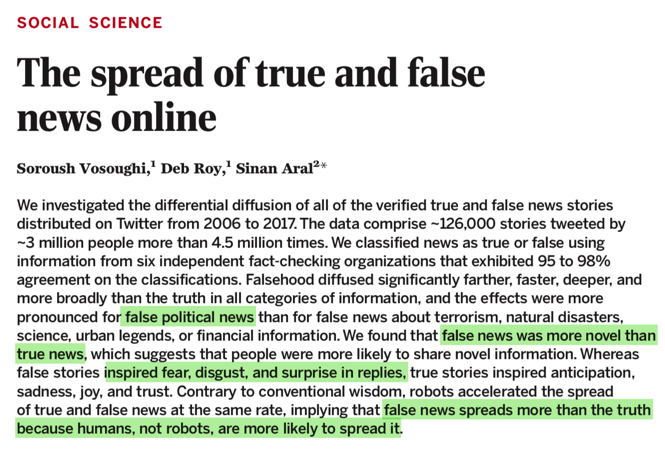

# The spread of true and false news online

Soroush Vosoughi, Deb Roy, Sinan Aral,*

Science  09 Mar 2018: Vol. 359, Issue 6380, pp. 1146-1151
DOI: 10.1126/science.aap9559

https://science.sciencemag.org/content/359/6380/1146.full
    
Acknowledgments: 

We are indebted to Twitter for providing funding and access to the data. We are also grateful to members of the MIT research community for invaluable discussions. The research was approved by the MIT institutional review board. 

## Data
https://goo.gl/forms/AKIlZujpexhN7fY33. The entire data set is also available, from the same link, upon signing an access agreement stating that 
- (i) you shall only use the data set for the purpose of validating the results of the MIT study and for no other purpose; 
- (ii) you shall not attempt to identify, reidentify, or otherwise deanonymize the data set; and 
- (iii) you shall not further share, distribute, publish, or otherwise disseminate the data set. 

Those who wish to use the data for any other purposes can contact and make a separate agreement with Twitter.

If you have any questions about the data or the code (or the libraries) please contact me at soroush@mit.edu


## DATA FILES


### emotions.csv
Has all the emotion data for **Figures 4d and 4f**. Each row contains an tweet_id and the emotional breakdown of the replies.

### topics.csv
Has all the topic data for calculating novelty for Figures 4c and 4e. Each row contains a tweet_id, the rumor_id, the rumor veracity and tweet and background topics.
The tweet and background topics are 200 dimensional vectors.

### raw_data.csv
Has the ananomized raw_data for every single tweet and retweet. It includes infroamtion about user and the propagation path. This data can be used to recreate all cascades.

The parent_id points to the parent of a node. If parent_id is -1, the node is the root node.
Creating and processing the cascades is very time consuming, therefore we have also included the already processed file (see below):

### regression_data.txt
Contains data for the regression model in Figure 4b

### meta_data.txt
Is the processed version of raw_data.csv. **All findings in the paper can be replicated using this file, in conjunction with topics.csv, emotions.csv and regression_data.csv**.

Note that this is not a csv file, this is a text files that is evaluated by python and turned into python objects.

Please note that due to our agreement with Twitter, we have removed all identified bot accounts/activity from the dataset provided

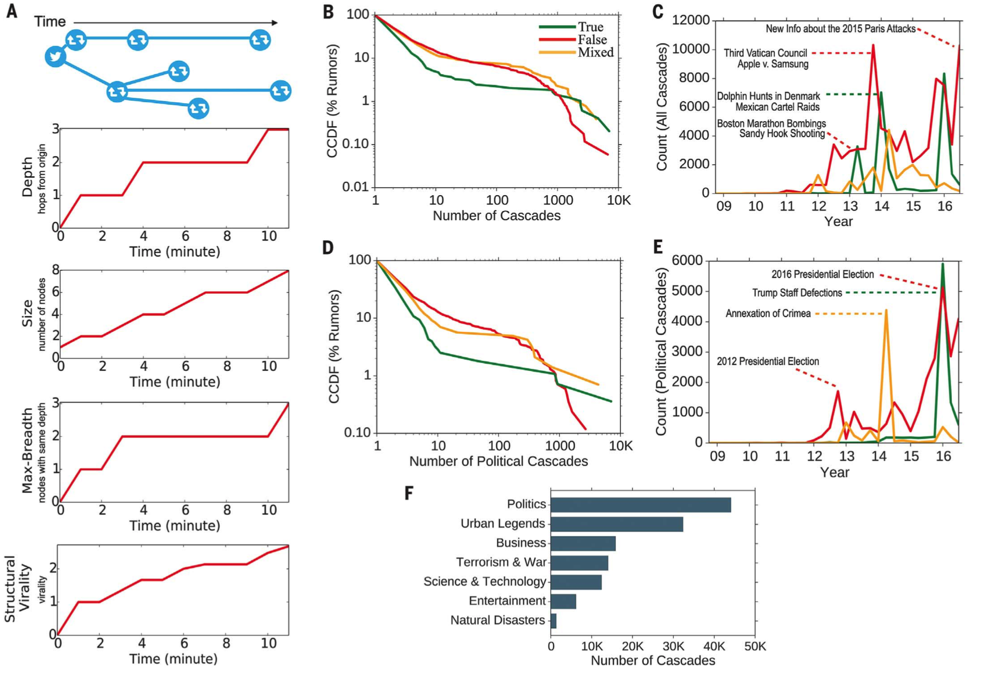

## Figrue 1A
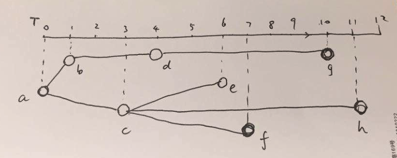

In [59]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import datetime

In [2]:
alist = [['a', 'b'], ['a', 'c'],['b', 'd'], ['c', 'e'], ['c', 'f'], ['d', 'g'], ['c', 'h']]
g = nx.Graph()
for i,j in alist:
    g.add_edge(i,j)

/Users/stevenchan/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


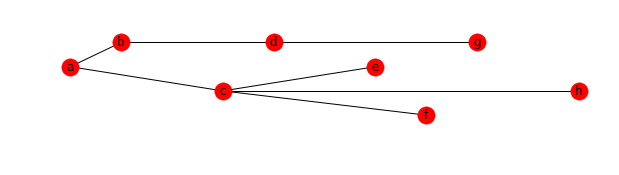

In [3]:
pos={'a': np.array([ 0.2 , 0.5]),
     'b': np.array([ 0.3,  0.55]),
     'c': np.array([ 0.5,  0.45]),
     'd': np.array([ 0.6,  0.55]),
     'e': np.array([ 0.8,  0.5]),
     'f': np.array([ 0.9,  0.4]),
     'g': np.array([ 1.0,  0.55 ]),
     'h': np.array([ 1.2,  0.45])}
plt.figure(figsize = [8, 2])
nx.draw(g, with_labels = True, pos = pos)

In [4]:
attrs = {'a': {'time': 0}, 'b': {'time': 1},
         'c': {'time': 3}, 'd': {'time': 4},
         'e': {'time': 6}, 'f': {'time': 7},
         'g': {'time': 10}, 'h': {'time': 11}}
nx.set_node_attributes(g, attrs)
g.nodes['g']['time']

10

In [5]:
def calc_depth(G,G_root):
    depth=nx.eccentricity(G,v=G_root)
    return depth

In [6]:
calc_depth(g, 'a')

3

## Figrue 1B

In [83]:
cd /Users/stevenchan/Documents/local-station/data/FalseNews_Data/

/Users/stevenchan/Documents/local-station/data/FalseNews_Data


In [84]:
cd data

/Users/stevenchan/Documents/local-station/data/FalseNews_Data/data


In [85]:
raw_data_file='raw_data_anon.csv'
regression_file='regression_data_anon.txt'
metadata_file='metadata_anon.txt'
emotions_file='emotions_anon.csv'
topics_file='topics_anon.csv'

In [86]:
# "Reading metadata..."
with open(metadata_file,'r') as f:
    lines=f.readlines()

In [87]:
len(lines)

126301

In [88]:
cascade_id2metadata={}
for line in lines:
    line=line.replace('\n','').replace('datetime.datetime', '')
    item=eval(line)
    cascade_id2metadata[item[0]]=item[1]


In [89]:
cascade_id2metadata

{1: {'virality': None,
  'verified_list': [False],
  'rumor_id': 'r_0',
  'depth2time': {},
  'veracity': 'FALSE',
  'num_followees_list': [236],
  'engagement_list': [7.09240543598],
  'num_followers_list': [164],
  'accountage_list': [1326],
  'depth2uu': {},
  'uu2time': {1: 0.0},
  'depth': 0,
  'unique_users': 1,
  'depth2breadth': {},
  'root_tid': 0,
  'rumor_category': 'Politics',
  'max_breadth': 1,
  'start_date': (2013, 8, 22, 21, 9, 8),
  'size': 1},
 10: {'virality': None,
  'verified_list': [False],
  'rumor_id': 'r_1',
  'depth2time': {},
  'veracity': 'FALSE',
  'num_followees_list': [1999],
  'engagement_list': [8.39449955042],
  'num_followers_list': [870],
  'accountage_list': [988],
  'depth2uu': {},
  'uu2time': {1: 0.0},
  'depth': 0,
  'unique_users': 1,
  'depth2breadth': {},
  'root_tid': 1,
  'rumor_category': 'Politics',
  'max_breadth': 1,
  'start_date': (2013, 4, 23, 14, 10, 17),
  'size': 1},
 100: {'virality': None,
  'verified_list': [False],
  'rumor_i

In [90]:
from collections import defaultdict
veracity2number_of_cascades=defaultdict(int)
unique_rumors=set([])
for cascade,metadata in cascade_id2metadata.items():
    veracity=metadata['veracity']
    rid=metadata['rumor_id']
    unique_rumors.add(rid)
    veracity2number_of_cascades[veracity]+=1
print("Number of unique rumors:",len(unique_rumors))

Number of unique rumors: 2448


In [43]:
print ("Total number of cascades:",np.sum(list(veracity2number_of_cascades.values())))

Total number of cascades: 126301


In [44]:
veracity2number_of_cascades.items()

dict_items([('FALSE', 82605), ('TRUE', 24409), ('MIXED', 19287)])

In [91]:
veracity2rid2count=defaultdict(lambda: defaultdict(int))
for cascade,metadata in cascade_id2metadata.items():
    veracity=metadata['veracity']
    rid=metadata['rumor_id']
    veracity2rid2count[veracity][rid]+=1

In [92]:
y,m,d = metadata['start_date'][:3]

datetime.date(y,m,d)

datetime.date(2013, 4, 19)

In [93]:
veracity2color={"TRUE":'green',
        "FALSE":'red',
        'MIXED':'orange'}
category2linestyle={'Politics':'-',
        'Other':'--'}
import sys
epsilon=sys.float_info.epsilon
fs=30 #font size 1
fs_2=30 #font size 2
lw=4 #linewidth for visualization
thresh=2 #threshold for dynamic measures (i.e., there needs to be at least two points for each observation)

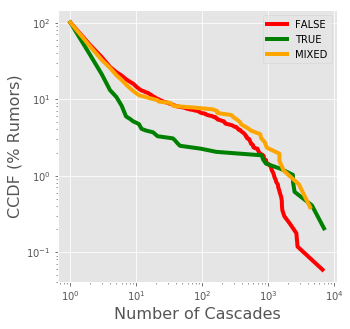

In [94]:
plt.figure(figsize = [5,5])

for veracity,rid2count in veracity2rid2count.items():
    rid_count=list(rid2count.items())
    rid_count.sort(key=lambda x:x[1], reverse=True)
    y=[count for rid,count in rid_count]
    total=float(len(rid_count))
    xf=[]
    pf=[]
    y.sort()
    counts=list(set(y))
    counts.sort()
    for d in counts:
        ind=y.index(d)
        count=len(y[ind:])
        p=(count/float(total)) * 100
        xf.append(d)
        pf.append(p)
    plt.plot(xf,pf,'-',color=veracity2color[veracity],linewidth=lw, label = veracity)
plt.xscale('log')
plt.yscale('ldata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAV4AAAFJCAYAAADT+EU5AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzs3Xd4VEXbwOHf2Zbd9EpCDx1CFwQEQWkiCIggRbG9iiJNUVQUwYLgq74ifhbAgiiKiCAQkKIUlS6EjnSkBUjvZZNt3x8LS07qbtjdbJK5rysXnDllJ8PJw8mcmWcki8ViQRAEQXAbRUVXQBAEoboRgVcQBMHNROAVBEFwMxF4BUEQ3EwEXkEQBDcTgVcQBMHNROAVBEFwMxF4BUEQ3EwEXkEQBDcTgVcQBMHNVBVdAXe6evWq3ceGhoaSlJTkwtpUDqIdrEQ7WIl2sCrYDrVq1XL4fPHEKwiC4GYi8AqCILiZCLyCIAhuVq36eAVBsJ/FYkGv12M2m5EkCYD4+Hjy8vIquGbuZ7FYUCgUaLVaW1vcChF4BUEoll6vR61Wo1LdDBMqlQqlUlmBtao4RqMRvV6PTqe75WuJrgZBEIplNptlQbe6U6lUmM1mp1xLBF5BEIrljF+pqxpntUml/O9s7969HDhwgIyMDPr160fbtm2d/hl5V45jUAehVqidfm1BEKo3jwm88+bN48CBAwQEBDBnzhxb+aFDh1i0aBFms5nevXszZMgQOnXqRKdOncjKyuL77793euCNXT2GKN8NbMu7m973LXHqtQVBsF/dunVp3ry5bfubb76hbt26ALzxxhusW7eOffv2oVBYf3lftmwZR44cYfbs2bLr/PTTT3z11VdIkoTZbGbq1Kn069ePyZMns2fPHvz8/ADQ6XSsWbPG5d+XxwTeu+++m3vvvZfPP//cVmY2m1m4cCHTp08nJCSE1157jY4dO1KnTh0AVq5cSb9+/ZxWh+TsRI6v78vIsEQABkt/Erv/R4I6POy0zxAEwX5arZZNmzYVKTebzWzYsIGaNWuyZ88eunbtWuI1rl69yieffMLGjRvx9/cnOzub5ORk2/7p06czcOBAl9S/JB4TeKOiokhISJCVnT17loiICMLDwwHo2rUr+/bto3bt2ixZsoR27drRsGFDp9XB9+g6HgxNtG0HKCE77hWUsbdhqtO8lDMFoeqqVbu2S69/9coVh8/ZuXMnzZs3Z9CgQaxevbrUwJucnIyPjw8+Pj4Asr9XFI8JvMVJSUkhJCTEth0SEsKZM2fYsGEDR48eJScnh7i4OO65555iz9+8eTObN28G4L333iM0NLT0Dxz4En9/sZSuIcdsRbV8LCRuu4+gx/6FwJBSTq6aVCpV2e1WDVTHdoiPj3fLqIbSPkOv19t+vuvVq8e3334LwJo1axg6dCj33nsv77//PhaLBbVajVKpRKFQyK7Zpk0batSowR133EH37t0ZMGCA7TdlhULBrFmz+OSTTwBo1qwZ8+fPL7E+Xl5ehIaG3vL94NGB12KxFCmTJIkBAwYwYMCAMs/v06cPffr0sW3bk9yj3pB1rIluyuDgm4PEw2rp0f/fbaQ8swfU1etlm0iKYlUd2yEvL88tY3aNRmOJ+7RaLb///rvs2Pz8fLZs2cKbb76JTqejffv2bNmyhT59+mAymTCbzUWu+cMPP3Do0CF27NjBG2+8waFDh5gyZQpms7lIV0Np9cnLyyMpKalqJ8kJCQmR9cUkJycTFBTk0s9UKFXouv7M9hx5ubZlHKHzHoBi/jMQBMF9/vzzTzIyMujduzedO3dm7969REdHl3qOJEm0b9+eSZMmMW/ePNavX++m2hbPo594GzVqxLVr10hISCA4OJhdu3bx3HPPOXSNmJgY9u/fz9ixY+0+p2VERz4NfZy66d8RWeABV93qIIFfPk/a2E8cqoMgVGYF+2BVKlWpT4TusHr1aj788EOGDBkCQE5ODl26dCE3N7fY4+Pi4khMTKR169YA/PPPP9R2cb91WSRLcb/PV4CPP/6Y48ePk5mZSUBAACNGjKBXr14cOHCA7777DrPZTM+ePRk6dGi5P8ORfLwaPw3Dv2rK2hqp+Bb4vcCSBZk5U8ka4dh/AJVVdfwVuzjVsR1ycnLw9vaWlbk78DZp0oQzZ87YtnNzc+nYsaNsCBjAmDFjGDRoEHq9nunTp+Pv72/bFx0dzQsvvEB8fDxeXl6EhITw3nvvERkZWWQ4GcC6devQaDTF1udGm9xqV4PHBF53cDQR+sK/F7Lh7/GsrgmKAhNWLFchteYX6Hu6dwhKRaiOAac41bEdPCHwehpnBV6P7uOtaIMbDiY14E6mJcvLpVoQ9M94VEcPV0zFBEGo1Kp84I2JieGLL74o17mSJDG722w+SlfxQ0ahfa1MhP4yDGVsrBNqKQhCdVLlA2/Hjh0derFWWOPAxoxrM54xCfC3Xr5PcXcuIR8NRkpLu7VKCoJQrVT5wOsMz7V/jho+dRlyFS4b5PtUA+IJeWMEVMPk0IIglI8IvHbQqXS80/Ud4kxw/zXIKZiSUwWaPv8QNH0sOClXpyAIVVuVD7y30sdbUN/6felXvx8H8+Dx+EI7/UHXZhN+H8y85c8RBKHq8+gJFM7QsWNHOnbs6JRrzbxjJn/F/sWKLD1vJsPbBVM31AW/hK8wfVefnMf/45TPE4TqLCUlhZEjRwKQmJiIUqkkODgYgOPHjxMVFYXJZKJu3bp88sknBAQEsGvXLhYsWMDixYtt15k8eTJ9+vRh4MCBPPjgg8THx6PVagGIjIzkq6++cvv3VuUDrzPV8avDC7e9wH/3/Zd3UqClBkb4FTigAwSsnY7p99rklZC4RxAE+wQHB9tSQs6ZMwcfHx+effZZwDqx4sa+559/nm+//Zbnn3/erut+9tlnLlk8wREi8DromdbPsOLMCs6kneGJeGikhg7am/ulQRD09TMkh63C0L59xVVUEJyk9leunV575WnH00IW1KFDB06cOOGk2rhHle/jdTaNUsO73d4FINdifdl2rdBEHsXjBoLffBjlhQvur6AgVCMmk4kdO3aUmBq2OBMnTqRv37707duXd955x4W1K5l44i2HrrW6MrTxUFaeXckVIwy5Cn/VAe2N/8bUoHwyg5AJo0j6fj3m6/1SgiA4h16vp2/fvsTGxtK6dWt69OgBlLwYZcFyT+hqqPJPvM4a1VDYjM4z8NdYE3HszYOnEgodEAiqBy8TPOZRKCFrkiAI5XNjSaC///4bg8FgS5AeFBREenq67Ni0tDTbSzlPUeWfeJ05qqGgGt41mNpxKq/veh2AHzOtL9umFfz3bQCaLocIem4SqQu+ADcklRYEZyvYB+tpSXL8/f155513+M9//sNjjz1GgwYNiI+P58yZMzRp0oTY2FiOHz9Oy5YtK7qqMlU+8LrSoy0e5afTP3E06SgA05Oho7eOe7QFnnA7gS52A6a33yZjphjnKwjO1qpVK6KiooiOjubBBx/k008/5YUXXiAvLw+1Ws2HH34oSxM5ceJE23Cy4OBgli1b5vY6i7SQJbA3DeDBhIMMih6EBWsz+khwukkotSyFzv0U0u95g+xbyBtREapjOsTiVMd2EGkhixJpIT1E+xrteaTFI7btbAv0vJiJQeEvP3AsBHw/E++lS91cQ0EQPI0IvE7w6u2vEqK9OY3tdF4eL+U2xlKwJ0cDvAgB/30J3apV7q+kIAgeo8oHXleNaigo0CuQ6Z2ny8o+uXSA7SGPyA8MBmkKBE59Du26dS6tkyAInqvKB95bzcdrr+FNhtM5orOs7KGjv5Na60n5gfVBGm8maNJ4vDZvdnm9BEHwPFU+8LqLJEm82+1dVNLN7oWr2VeZkaIhN6Sf/OB2ID1kJPiZp9Fs2+bmmgqCUNFE4HWi5sHNebr107KyL459zd6az5HvV2imTF+QeucT/OSTaP7+2421FAShoonA62Qv3PYCNX1q2raNFiOv7n6H5FaLMHoVSjbyECha5hL82GOoDx50c00FwfPVrl2bSZMm2baNRiOtW7fmscceA2DZsmW8/rp1EtOMGTOYO3eu7dj/+7//Y9q0aYA1NWSXLl1sORoGDx5sO79169bcc889dOvWjYcffph9+/a5/PsSgdfJfNQ+zLxDPlFiT9well/aTkrrxZiVBfJIKoDxoKiRRcjo0aiOHXNvZQXBw3l7e3Pq1Clyr0+737ZtGxEREcUe+8orr/Dzzz9z8eJFLl26xNKlS5k6dapt//Tp09m0aRObNm1izZo1tvLBgwfz+++/s3PnTiZMmMDTTz/NmTNnXPp9iZlrLtA/sj+96vZi6+WttrJ3/n6HPsP/QtnyS4KPPopkuT4I3Qt4CRRvpBPy0EMkr1iBsVmziqm4IBSj1p+uTQt59e7S00L27NmTLVu2MHDgQFavXs2QIUP4u5juOT8/P6ZOncr06dYRRi+99BIBAQEO1aVbt26MHj2aH374gbffftuhcx1R5Z943TGcrDBJknin6zt4Kb1sZUm5SXwQ8wF5wT1Ib/Jf+QkBwCug1KcQMmoUyn//dWt9BcGT3X///URHR6PX6zlx4gTtS8lzPWTIENLS0sjMzOTBBx+U7Zs1a5atq2HixIklXqN169acO3fOafUvTpUPvO4aTlZYpH8kk9pNkpUtPr6Yw4mHyan1MJn1Cv3D1waeB2VyAiEjR6K8fNl9lRUEDxYVFUVsbCzR0dH06tWr1GOvXr1KYmIi8fHxZGdny/YV7Gr47LPPSryGO7IoVPnAW5HGtRlHpH+kbduChWk7p2G2mMlsMJXcsEHyE1oBT4Lq6lVCRoxAce2aW+srCJ7qnnvuYebMmQwZMqTU4958801efPFFBg0axEcffVSuzzp27BiNGzcu17n2En28LqRVaZnddTajN462lR1KPMTSU0sZ3Xw0qc3nosy7iiZj/82T7gYSQBV9iZDHHydp1SosPj5ur7sg3FCwD7aikuSMHDkSPz8/WrRowa5du4o9ZuvWrSQlJTF8+HByc3Pp27cvI0eOpGnTpnZ/zu7du1myZAnLly93VtWLJZ54XezuunczoMEAWdm7e98lRZ8CSh0prRZh1NaXnzQCuAPU//xD4KRJYDa7r8KC4IFq1arFmDFjStyv1+t58803effdd5EkCW9vb15//XXbUDOQ9/H27duX/Px8ANasWUPfvn258847+fTTT/nqq69o0qSJS78fkRayBM5MA3gl6wp3Lb+LXOPNPL2jm4/mg+4fAKDMOUvYgftRGNNunmQA3gdOQOb48WQWuIHcqTqmQyxOdWwHkRayKJEWshKp7Vubye0ny8p+PPkjBxOskyZM3o1JafU1Fkl98wA18BLQEvzmzUNXAcmaBUFwDRF43eSZ1s/QKKCRbfvGizaT2QRAfuAdpDWbIz9JizX4toHAqVPR7NnjvgoLguAyIvC6iUapYVa3WbKyI0lHWHJyiW07N2IYGQ0LdSlcz+MrtTIQNGaMWDJecJtq1AtpN2e1iQi8btSjdg8GNZQPIXs/5n2Sc5Nt21n1xpPe6E35iWpgMigbpxL8+ONIhVZRFQRXUCgU1bo/tzCj0YhC4ZyQWeVfrsXExLB//37Gjh1bYS/XCrqadZW7lt9FjjHHVvZQs4f4sMeHsuO8r3xL4JlCT78mYD7oNXeRsngxqFw/GrA6vlQqTnVsB4vFgl6vx2w2I0kSAF5eXuTl5VVwzdzPYrGgUCjQarVIknTLL9eqfOAtyBMCL8D8w/OZtVfe7bBm8Bo6hHeQlXlfXULA6alIFPgnMgNfQnajJ0ifPdsl9SuoOgac4oh2sBLtYCVGNVRCT7V6iiaB8nGCBV+03ZBTazRpzediKfjPpACeAZ8L3+Izfz5Un/83BaHKEIG3AmiUGmZ3kz+tHks+xvcnvy9ybG7EcFJbfIYF5c1CBfA0BOyeRcDUqXB9ILggCJWDCLwVpFutbgxpJJ93/sG+D0jKLfprnD78flJbzpcHX4AnwOfkEkJGjUIhfv0ThEpDBN4KNKPzDHzUN/MwpOenM3tv8f22+rD7rJMsCqbXUAATwSv5b0IHDBCJ1AWhkhCBtwJF+EQw5bYpsrKfT//Mvrjilx7JC72HlNYL5X2+GmAKqIxXCB0yBO2vv7qwxoIgOIMIvBXsyVZP0ixIvuLEtJ3TMJqLHz+ZF9KH9KbvyQv9gVdAocwleOxY/N57T/T7CoIHE4G3gqkV6iIv2o6nHGfx8cUlnpNTazSZ9Z6TF0YAUwA1+H36KWH33ovaDYv2CYLgOBF4PcAdNe9gaOOhsrIPYj4gMSexxHMyG7xCTvgweWFTYDwggfrUKUIfeICA115DyshwfqUFQSg3EXg9xIzOM/BT31yBONOQyX/3/bfkEySJtGYfkhfYTV7eCbied12yWPBZvJgaPXui3bDB+ZUWBKFcROD1EDW8a/BSx5dkZcvPLOdMainLTCs0pLT6GoNPc3l5f+BxwDrLE2VcHMFjxuA/cyaYTIWvIgiCm4nA60GeiHpCNqPNbDHz4f4PSzkDLCp/klsvxqSJkO+4B5iENcHOdb5ffEHQM88g5eQgCELFcTjwpqWl8e+//3Ly5EmuXr3q8dmLKmJ59/JSKVS83PFlWdmv53/lWFLp43PN2tokt1mMWRUg39EZLFMB3c0i3caNhAwbhiIuzkm1FgTBUXYlyTl37hxbtmzh8OHDRRJkqFQqGjduTLdu3bjzzjuLLBXiSTwlSU5pLBYL/Vf352jSUVtZr7q9+P7eotOJC1NlnSTkyGiU+fKgarmiQnrXCAVWFjLVrEnKwoUY2rYt9ZoiKYqVaAcr0Q5WLs1Odu7cOb7//ntOnDhBvXr1aNGiBZGRkfj7+6PRaMjKyiIhIYGzZ89y9Kg1UNx///0MHDgQjUZTzm/JdSpD4AXYenkrj258VFa2etBqbo+4vcxzlforBB8ZjTpH3jdsSVMjvW2AhAJlSiVZY8eS+eKLoNNRHPGDZiXawUq0g5VLA++jjz5K79696dOnD3Xq1Cn1Qvn5+cTExBAdHc3tt9/Ogw8+6HBlXK2yBF6LxcLQtUPZG7/XVnZHzTtYft9yW17U0kiGFEKOPiFfNh6wZGqRpukhRX68MTKStP/9j/yuXYtcS/ygWYl2sBLtYOXSwJuWlkZgYKDDFy3vea5WWQIvwJ5rexj2q3yc7tL+S+lRp4dd50umXIKOP4s2ebOs3JwdgOKldChmaG/O8OFkTJ+OOTTUVlbR7eApRDtYiXawcmk+3vIGT08MupVNl5pduKv2XbKy92Pet3vNJ4tSR0rLheTUkE/MUPikY5xXF1PD8CLneC9fTo0ePfD+9lsx7EwQXMjuUQ0ZGRlF/qfbtGkT33zzDfv37y/hLOFWTL19qmz7UOIhfrv4m/0XUKhIaz6X3NABsmKVdBnTRxFk/+ehoqekpxP4+uuEjBgh1nYTBBexO/DOnz+f1atX27ZXrFjB119/zY4dO/jggw/YtWuXSypYnbUNa0v/yP6ysv/F/K/IShWlUqhIjfoMfXBPWbEm+zDqoWdIXvk9hmbNipzmtWcPocOHQ0JCkX2CINwauwPvv//+S6tWrWzbmzZt4oEHHuCbb76hX79+/CrSEbrEyx1eRuLmC7WTqSeJ/jfasYsovEht+RV5AV1kxZqMGPwV75K8ZjHpM2Zg9vGR7Vf/8w/q3r1RXLlS7voLglCU3YE3KyvL1nd76dIl0tLSuOsuax9kp06dHHpxJdivWXAzHmj8gKxszv45GMwGh65jUepIaf0t+X7tZOXq7BOEHnsQ/WP3kPDXX+TdLh+yJp0+Tdj996M+cqR834AgCEXYHXh9fX1JTk4G4NixYwQHB1OzZk3Aut58NVqs2O1evO1FVNLNlScuZFzg59M/O3wdi8qP5DY/khfQSVau0l8m9OADKH0TSfnxR/R3yV/qKa9dI/SBB9BGO/ikLQhCsewOvK1bt2b58uVs3LiRX3/9ldsLPBldvXqV0AJDkATnahDQgJHNRsrK5h6Yi96od/haFnUAyW1+RB/SV1auNCQRcnAompwdpCxaRO4A+Qs5Sa8nePx4AqZNQ8rKcvybEATBxu7A+8gjjxASEsKPP/5IeHi4bILE9u3bad68eSlnC7dqcvvJeCm9bNvXsq/x/YmypxEXS6kjpeXX5IQPlxUrzLkEH3sSn4TFpM6bR9aYMUVO9fnuO8J69bI+/ebmlu/zBaGasytXA0BOTg4qlarYqcA5OTloNBpUKlUxZ3qOyjSBojhv7X6Lr459Zdv2Ufvw830/0y6sXSlnlcJiwe/fd/G7PK/Iruyaj5De+G1qbNyCcuJEpGKWEjL7+KDv35+sSZMwNm5cvjpUEp54P1QE0Q5WLp1AcYPJZOLJJ5/kSAkvWLy9vT0+6FYFE9tNxFt1MwlRtiGbRzY8UnrO3tJIEpmNXietyX+LLB3vc+0HQg/ej3lYN5JWrMAYGVnkdEV2Nt4rVhDWsyeBEyeiW71aLDMvCHawK/AqlUoCAgJQKET63ooUqgvl9c6vy8pS81IZtWEUsZmx5b5uTu3HSGmzGLPSV1auyTqGenMXlHVjSdy8mayxY7EUcw9IZjPeq1YRNGEC4R074jdnDnh4ulBBqEh2R9Lu3buzdetWV9ZFsMMTUU8wqd0kWVlcdhyj1o8iKbf8T5t5wXeT1H41Rm09WblkzCT4+Hj8L79NxuuvkPjbb2Q9+SSm8KJTjgEkgwG/jz4idNgwVKdOlbs+glCV2d3H+/vvv7Nq1SoCAwPp2LEjQUFBRY7p1auX0yvoTJW9j/cGi8XCqzte5YeTP8jKW4W0YvnA5fhr/Mt9bcmQTuCpl9AlrS+yz+ATRVadp8gL6o5ZUxPthg34/e9/qM8U39VhUSrJHjOGjKlTwcur2GMqC0++H9xJtIOVS7OTFTRy5Mgyj1m2bJnDFXCnqhJ4AUxmExP/mMiaf9fIyrtEdOGH/j+gUxWfX9cuFgveV78j4OzbSJaiL9UAjLqG5AX1IC+gG5yQ0OzYj/fSpSjS0oocm9+2LWlz52IsZmpyZeHp94O7iHawclvgTUwseanxG8LCwhyuQHnEx8ezcuVKcnJymDJlit3nVaXAC5Bvyuc/v/+HP2P/lJX3rdeXhX0XolQoiz/RTurMo4SeHI+U/W+px1lQYPBvR75XB9SLD+K1NAaKSSeRO2AA6W+/jbkcN2pFqwz3gzuIdrByW+B1tXnz5nHgwAECAgKYM2eOrfzQoUMsWrQIs9lM7969GTJkiG3fnDlzqnXgBcgx5DBq/Sj2J8gzxL19x9uMaVV0HK6jQgM0mHY9hS5xTdkHX2exaLCcklDE5MExIBa4fpeZ/fzIePNNckaNAjuSunuKynI/uJpoByu3DCcr6NKlS2zcuJEVK1bw22+/cenSJYc/tDh3330306ZNk5WZzWYWLlzItGnTmDt3Ljt37iQ2tvxv76sib7U33/X7juZB8gksH8Z8SEKOEzKLqf1JbTmfxNvWkxH5EnkBnbBIpQ8dlKR8FM3z4BHgPeBzYAJwFyi8Mgl86SXC27cn4JVXRAIeoVqye/CtyWTi888/Z+fOnUX23XnnnUyYMOGWhptFRUWRUCgF4dmzZ4mIiCD8+hv0rl27sm/fvjKXIapugrRB/ND/B3ou70mmIROATEMms/fO5v/u/j+nfIbBvy0G/7ZkRb6AZMxCk74Hr5RteKXuQJ1TxuiFAKDr9S+AOFBuSsTnxyVo168n6/nnyR0yBLObuqoEoaLZHXiXL1/O7t27GTlyJN27dycwMJC0tDS2b9/O8uXLCQ8PZ8SIEU6tXEpKCiEhIbbtkJAQzpw5Q2ZmJkuXLuXChQusWrWKBx54oNjzN2/ezObN1qVv3nvvPYfySahUqkqVfyI0NJQ3erzBy1tuLg+/4swKxnceT7e63cp93eLbIRQiIoFRWID83KsoEv5Ait9i/VNfRpdOBPAocDsol6cS8Olb+M96G0v/gZhmzsQSFVXu+rpKZbsfXEW0g9WttoPdgXf79u0MGzaMoUNvLiUTFhbG0KFDMZvN/PHHH04PvMV1P0uShJ+fH88880yZ5/fp04c+ffrYth3pm6qMfVkjIkewMGghJ1NP2somrJ/Axgc2olKUb2ahfe2gAZ9+0LAfNLCgyjmLV+p2NKnb8UrbhcJUQlKd5sAM618lkwUpZS2KFWsxmYMw+dTHUCOKvBbdMUS0xqStBYqKG5JWGe8HVxDtYOW2Pt7U1FSaNm1a7L6mTZuSmprq8IeXJSQkxJaKEiA5ObnY8cOClUqhYna32bKyEyknWHx8sfsqIUkYfZqQXedJUlsvIq7bPyS2j77eP9yl5POUQBgQBcpWqWgaHMLH50eCL40jfO+d1NzWhMDjzyEZi1mlUxAqGbsDb1BQEKdKmIl0+vRplwTERo0ace3aNRISEjAajezatYuOHTs6/XOqki41uzC0sXyBy//t/x+JOWUPB3QJhQpDQEeyIl8guf0vJHTcgklT/Ky30kiY8E74hRq/dUN99m8XVFQQ3Ef51ltvvWXPgZmZmbY110JCQtBoNCQnJ/P777/zyy+/0K9fP9nSQI76+OOPWbZsGcnJyWzevBlvb28aNWpEREQEn376KRs3bqR79+506VLKU1MxYmJiWLt2LR07diQzM9Pu87y9vcnJyXH02/AIHcI7sOTkEvLN1skPeaY8UvJSuDfyXoev5ex2MGtCyYkYgUXpg1kViEWhA4sBhdm+FJMKTS4+/y5DvegQZnUQptq1QXlr45XtUZnvB2cS7WBVsB38/PwcPt/ucbwmk4nPPvus2EUtu3XrxsSJEz0+iU5VHMdbki+OfMHMv2fKylYPXs3t4beXcEbx3NUOkikHpf4KqrijeP27F1XCP6iTT6HQZltfxhWeBZ0PpIAlR4nZuwYm/1oYA+thrNEIs3c4ZnUQZnXwzS9VAJSznxsq//3gLKIdrNw+geLy5cucOHGCrKwsfH19iYqKqjTDu6pT4DWYDfRb2Y9TqTe7h3rV7cX39zqWPL1C28FkQrthA7q1v6BtsRWp3a1lPDOrAgsFZHlwNqlDMGvCMWnCMGvCQKG2nVvZ7wdnEe1gVWWsL/KdAAAgAElEQVRmrrlKTEwM+/fvZ+zYsdUq8ALsvLqTEetujjSRkNg1chf1/OuVcpacx7RDThahW0eh8T3oto80qYMxa2pg1oSh8qtHrsX/elAOl/1pUflXqll4t8Jj7ocKdquB1+HfvZKSkkhOTsZgKLrK7a308bpKx44dq+0Lua41u9ImtA1HkqwJ7C1Y+OHkD0zrNK2MMz2Qty9J963B/9wsfGK/QcKxVZbLQ2lIQWlIgeyTkAq+JRxnUWhtT8kmTTgG/9vICR+G2cvxl4hC9WD3E298fDyffPIJZ8+eLfEYkZ3M8/x06iembLuZzyJYG8y+h/ahVWntOt8j28FiQmFIQ6FPQHN4J16n9qNMOo8yIxaFIRXJF/C7/uVb4E93VhEl+pA+5NR8iLzgnrfUv+xJPPJ+qABue+JdsGABSUlJPPHEE9SuXVss9VNJ3N/ofmbumUl6fjoAKfoU1p1fx7Amwyq4ZrdAUmLWhGDWhGDs3oKc7jeTAUk5OahOnUJ98iTKS5fQfr8O9blz1oGTvtwMxH6F/u6HdWpzoPXL4gfSLbwrljChS/4NXfJvmDQRpDeZjT7M8VElQtVkd/Q8d+4c48ePd3g4l1CxdCodw5sO5+tjX9vKvjv+XeUOvKWweHtjaN8eQ/v2AGS+9BLa337Da8sWvHbtQmVnUidJAfiDoXUdcp5/Ap9WdclJOYciPxFlfgKKvASU+Yko8uPLHAqnzI8j6Ph44rrux6IWE4AEBwJvSEhIpXzKLfhyrbp6tMWjssC7P2E/x5KP0SrE8/rknU6pRD9gAPoBA6ybsbFodu1CfewYqvPnUZ07h+rixaLnmYE0UG+PJWD7LMwtWqBu0gRjZCQ5nfuQd+edcP3nQTJmoci3BmJ15mG8r/1UJHGQZMkjfM8d5NQajVHXAKMuEqOuAWavmrf2aC1USnb38W7bto1Nmzbx+uuvo9Xa1z/oaapjH+8NI9eNZMfVHbbt0c1H80H3D8o8r6q1Q3GUFy+iW7kS1dmzKK9cwWvfvjLPMbRsSdr779uerGUsFtQZBwg7OLjM61gUWoza+hi9G2C6HoxvBGZPDMrV4X6wh1uHky1dupTNmzfTpEkTfH2Lvq2YOHGiwxVwp+oceNefX8/Tm5+2betUOg6MPlDm+mxVrR3soTx3jqAXX0QTE1Pmsflt25LXqxf517s3zMHBtn2+Fz/D//x/y10Ps9KHnFqPkdHg5QpNEFRQdbwfiuO2l2t//vknq1evRqFQcP78+SLdDlI1GcdYWd1T/x4ivCOIy4kDINeYy4rTK3iy1ZMVXDPPY2rUiKToaLQbNuC9eDFeO3cimYpZywjQHD6M5vBh27ahRQv0/fuTM2QI2bUfQpO+F23KlnLVQ2HKxvfyfJS5F0mNml9lRkYIDjzxjh8/noYNGzJu3Dh8fHxcXS+XqM5PvABzD8zlw/0f2rYDNAG82eVNRjQdUeJ/nFWxHRwlpaQQeu0a2YcP47NggXWUhB3MgYFkvPQSuY8MQZV7HlXOeVS5F1DmWv9U5Z5HYSy6OGhxcsKHk9bs/Qp/8hX3g5XbuhoeffRRXnnlFVq3bu3wh1Sk6jxzrbC47Dg6Le2EySJ/eusS0YX37nyPJkFNipxTFduhPGztYDajW7kS72XL0OzejWTHj4++Vy9SvvwSdEVXfpYMKdYgnHMeVe55lNcDsirnDApTtuxYg09z0prPxeDXxmnfl6PE/WB1q4HX7uxkJ06cwNfXl8aNGzv8IRWpVq1atplr1SU7WUl8Nb5kGbKIiZf3XcZmxbLk5BK0Ki0danSQPf1WxXYoD1s7SBLGqChyR4wg56GHMDRrhjk8HMxmFImJFPd7g+r8eby2bSN34EAo/GJaqcPsVROjbxT5QV3Rhw0gp9ZocsKHok1ch8J0855VGpLwvvYTkjmf/IBOILk+K1th4n6wutXsZHYH3saNG/Pjjz+i0+kIDg5GrVZjsVhkX57ez1vdAy/AnbXuxEvlRUx8DEbLzaQzZouZbVe28U/yP9xV5y7bzLaq2g6OKq4dLH5+GFu1Iq9PH3IefZTcESOwaLVoDh5EMptlxyrj4vD7/HO0a9eiyMrC2KgRFm/vEj/PovJHH9ILXdJvshU8JCx4pf+NJm03eSF9sChLvoYriPvBym1pIUeOHFn6hSSJn376yeEKuFN172oo6GLGRabvms7Wy1uL7KvrW5c5d82ha82uhIWFVel2sJej94P3kiUEvvJKifstkoSxSRP0ffqQNWEClsDAYo+TDGkEnH0T7/gVRfYZvWqT0noRRt+WdtfrVlX1nwt7ua2P9+effy7ziXb48OEOV8CdROCVs1gsrP13La/ueNU2pbigdmHteKnrS3QP7V7uNduqivLcD6rTpwkdNAhFVglrzl2X364dSWvWlJrQ3StpE4Gnp6LMj5eVmxXepLT+jvygriWc6VzV4efCHiItpANE4C3e5czLjN08lsNJh4vd3zCgIS91eIlBDQeh8LAB/e5S3vtBGRuLz7ff4vXHH6hOnSrxZVz2o4+S/u67UMpiApIhheB/nsUrbaes3ORVk4RO27Eoi768c7bq9HNRGhF4yyBGNdgnz5THrL9n8c0/35R4TIvgFnzR+wsaBTZyY808gzPuByk1FZ8ff0S3ahXqEyeK7DcHBJDfrh2GNm3Q9+mDoUOHonl+zQYCzr6Fz9VvZcUZkS+TFTn5lupnj+r2c1EStwXeFSuK9jEV9uCDDzpcAXcSgbdse67tYd7heWy5XPyg/9q+tflr+F/oVK5/uvIkzr4f1EeOENa/f6nHmEJDyb/jDrKfeIL8Qsmp/M+8ge+VhbZti6Qhq+4zZNUdj0Ud4LR6FlZdfy4Kc1vgLevlGoh8vFXJmdQzLDiygOVnlhcZ9zu903TGtR1XQTWrGK64H3TLlxP4wgt2jQXOGT6crIkTMTZqBJKEZEinxt/dUBpTZceZVYFk1n+O7FqPg9L5OVWq+8/FDRXa1ZCVlcX+/fv59ddfefnll6lRo0Z5L+UWIvA6LlWRyqR1k/gj9g9bWYAmgF2jdhHoVfyb+KrIVfeDZvdufBYuxGvXLhTpRV9wFmYKCiJ31CgyXnsNXcIKgk69WOxxRq/aZDZ4hdzwYU5dlkj8XFi5bQJFcTQaDZGRkeTn59uWX/dkYhyv4+qG1KVTSCd+OPGDbLl4CYnutT3739uZXHU/mOrWRT94MFnjxpE7ZAj57dqBQoHyyhWkYpbXUuj11uQ9BgPZ/Z/FqK2HJuNAkVluClMmuqSNqLOOkBfUw2njfcXPhdWtjuN1yivqyMhIjh8/7oxLCR4oWBvM+LbjZWVfH/uaN3e/yYmUoi+JhHJQKDA2bkzu8OGkfvUVcSdOkLxkCYamTYs93O+zzwicPBl9wEASOu8ko8ErmJVFMwZqkzcTFtMHr5S/XP0dCA5wSuDdv38//v6lpxcUKrcxrcYQ7n1z8cY8Ux5fH/uaPr/04b7V9/HtP99yLu0cVXyQjPuoVOTdfTeJGzeS/sYb5N1xR5FDvJcvJ6JlS7TL15BV/3kSOu8iq84YLJJadpwyP4GQIw/jf/ZtMJW+WobgHnb38c6bN69ImdFo5PLly1y6dIkRI0YwbJjnLScjhpPdmoLtsOTkEl7ZXvJsLIBw73DuqHmH7athQEOPn0puD0+4HzT79hEyYgRSfn6RfSnz56MfbE28rsy9QNCJ59Bk7C9ynFkVQG6NB8ipOQqDn+MJrzyhHTyB216uTZgwoUiZRqMhNDSUbt26cdddd3n8D5gIvI4r2A4Wi4W5B+ay8J+FpOXZl84w3DucHrV7MKndpEo9/tdT7gdtdDTB48cXKbdIEpmvvUbWuHHWSRhmI34XP8b34v8hYS7mSmDwbUlOxChywh+wey04T2mHiiYmUDhABF7HFdcOeqOejRc28tPpn9h+Zbtd1/FV+/J1368r7Qs5T7of1AcOEDRhQrELd+Z160bKggVYrq+EoUnbS+CJiajyrpR4PYukQR96Lzk1R5EX1L3U5YY8qR0qkscE3rS0NAJLSPThKUTgdVxZ7XA58zKrz61m19Vd7IvfR66x5D5EtULNR3d9xNDGQ11RVZfyuPvBYsH7u+8IePNNJKNRtsvQrBnJy5ZhDgsDQDKk43fpE3RxP6M0pJR6WaNXbTIavYG+xsBi93tcO1SQCg+8KSkpREdHs3XrVr7//vtbuZTLicDrOEfaId+Uz+Gkw+y+upvd13aXGIhfu/01JrSd4PFdUwV56v3g9eefBE2YgCJN3vWj79WLlMWL5WN4zflokzfhfe0nvFL+LLELwiKpie+8C7O2aEDx1HZwN5cH3rNnz/Lnn3+SlJREREQEAwYMoEaNGmRmZrJ8+XK2bNmCyWSia9euPPfcc+X7LtxEBF7H3Uo75JvyWXhsIbP2ziqyr2ednrQObU2kfySR/pHU969PuHe4xwZjT74fFNeuETRxIl579sjKMydPJvPll4s/R38V7/gVeF9bhkp/ocj+1GZzyK05qki5J7eDO7k08MbExDBnzhzMZjP+/v5kZWXh6+vLlClTmDt3Lmlpadx+++2MHDmSunXrlv+7cBMReB3njHaIPhfN5D8n2yZglESn0lmDsF99IgNu/tnAvwG1fGqhVLh/xYUbPP5+0OsJ698f9enTsuLE6GgM11dgKZbFjCb9b/wuzJVlPcuOeIj05h8WOdzj28FNXLrKcHR0NHXr1uXVV18lODiY3Nxc5s+fz6xZs9DpdLzxxhu0bOm+JMxC5XR/o/sJ04Xx1KanyMjPKPG4XGMuJ1JOFDspQ61QU9evLpH+kXSJ6MLjUY/jqyk6YaDa0mpJnzmT0FHyp9TAl18mccOGoksO3SApyA+8g8x6Blng1WTsc2Vtq71SJ1BcunSJoUOHEnz9DalOp+ORRx7BYDAwevRoEXQFu3Wt1ZVVg1bRMKBhuc43mA38m/4vWy9v5d1973L/mvtJyhVPXgXld+9OXqFp++rTp4lo1w5dGavDGPzbYykQDtQ5Z/FK+t0l9RTKCLx6vZ7Q0FBZ2Y3tOnXquK5WQpXUPLg5fz74J6sGrWJOjzlMbDeRQQ0H0Tq0NX5qx+a7n0w9ych1I0XwLSR50SJMQfIxuYrMTAKnTkV5pZQhZSo/DH5tZWVBxyegyjzmknpWd+Vez0VZyjIlnqTgzDWh4ikVSjpFdKJTRCdZucViITUvlfPp57mYeZEL6Re4kGH9uph5sdgAezL1JKPWj2LloJX4a8SUdQB0OjJmzCDoRXnWMsloRPfzz2S98EKJp2Y0nErI4Ydtox0U5hxCjj5OYodfMXvVdGm1q5tSX66NHDmS+vXro9PJk16fPHmSyMhItIX6jd5++23X1NJJxMs1x3lKO2TmZ3Ix4yLv7n2Xv67IE770qN2DxfcuRq1Ql3D2rfOUdrCX+uBBgv/zH5SJibYyY716JOzYUerabt5XviXwzOuysnzfViS3W4lF5VPp2sFVbvXlWqldDS1atMDHxweFQiH7ioqKwtvbu0i5ILiKn8aPVqGt+Oaeb7i7zt2yfduubGPajmkiQU8BhvbtSfjrLywFHo5Uly7h/cMPpZ6XU/sJsmo/JSvTZB0j4OwMl9SzuhJThksg/me38sR2yDXmMnzdcA4mHJSVP9P6Gd7o/IZLxgJ7YjvYI3DyZLyXL5eVxf/1F6bGjUs+yWIi+NiTaJM33yySVMTfcYDgWs0qZTs4m0ufeAXBE+lUOhb1XURdX/nY8S+Pfsl/9/0XvVFfQTXzPJmTiy6AGdavH17btpV8kqQktcU8jNrIm0UWI9qENS6oYfUknnhLUFmfcJzNk9vhTOoZHlj7AKl58nXHJCRq+daivl99GgQ0sM2MuzFLzkft4/BneXI7lCV04EA0B+W/HZhq1iT+779L7e/1vfgp/uffs23n+7WHfnsqbTs4U4XnaqhMROB1nKe3w7HkY4xcN9LuNJUAYbowWTBu4N/A9vcgbfHpET29HUqjOn6coGefRX3unKw8cd06DO3alXieUn+F8D3y0Sf5/Y6SlBfsknpWJiLwOkAEXsdVhnY4kniEketHljorzl6BXoFFpiw3C2pG9ybdyUyzf80+j2MyEd6xI8qEBFlx9mOPkdejB3l33YXFu+i6bCEHH8Qrfbdt2xx0G6l1JpMX3Mupi2hWNiLwOkAEXsdVlnY4m3aWOfvnsD9hP1ezrmLBube1WqGmRXAL2oS2oV1YO9qEtaFpUFOXDmFztoApU/ApYQabsU4dkpcsKfLSzfvaUgJPvVTkeINvSzLrTUIfNgCkyjGm35lE4HWACLyOq4ztoDfquZx52TYB40LGBS5mXOR8xnliM2MxWoxlX8QOWqWWliEtaRvW1voV2pZGgY1QlJJIvCIp//2X0GHDijz13pD15JNkvPOOrEwyZlLj724oDcnFnmPQNSKr3gRyw4dCJfpP6FZVWOA9duwYhw4dAqBt27a0bu34+k3uJgKv46paOxjNRq5kXeFCxgXOZ5znYsZFa3BOv8ClzEvoTbc2IsJH7UOb0Da0CW1D27C2tAxpSZguDH+Nv0ekvFQkJeH/1lvofv21yPLxxlq1SNi9G1TyCa2q7DP4n5uJNmVridc1etUmq954ciJGglJX4nFVRYUE3o0bN7J06VLatGmDXq/n2LFjjB49moEDi89a7ylE4HVcdWoHs8VMXHac7Qn5QsYFzqWf40jSEa5klZznwB5KSUmQNoggryCCtcEEa4Ntfw/SBhGkDSLYy/r3G/v9Nf4ue3qWcnLQrV5NYKF8vakffUTuyJHFnqPOPEpI3JdIV1YhldCVY1KHkV33GbJrPYZFVXWzx7k08JrN5mJnpE2aNIkpU6YQGRkJwG+//cbq1auZP3++wxVwJxF4HSfawcqsM/PHqT84knSEQ4mHOJx4mMTcxLJPvAUKSUGQ182gfCNIlxa0A70CHQrWhft9TRERxMfElPjiLDQ0lLSLu/G99Dm6+JVImIo9zqwKILv2k9bl5tWevSRYebg0H++rr77K008/TZMmTWTlhbOWBQcHk1/MktOCUFXU8KlB73q96V2vN2BN6nMt+xpHko5wOPGw9SvpsEPD2spitphJ1ieTrC++f7U4CklBoFdgiU/WBcuCtEGEjnucZst+Qnn98UsZF0eNzp3JHjOG7EcfBV3RbgOjTxPSWnxMZuQUfC/Px/vaT0iWPHk9jOn4XZyLLn4lSbetwawJLXKd6qzUJ97o6GhWrlxJt27dePjhh/H1tf7q8OWXX3L+/Hnuuusu8vLy2LhxI23atGHcuHFuq7i9CmYnE0+8jhPtYGVPO1gsFi5lXuJw4mHbk/GlzEuk6lPJMea4qaaOkywQnAshORCaAyG5cMdleCa9KcYvvsVUv77t2OLaQZEXj2/sV3hfXYzClF3k+iUtI1SZubyPNzk5mUWLFnHy5ElGjx5Nz549yc/P55dffuHw4cMAtG7dmmHDhhXJVuZpROB1nGgHq1ttB71RT2peKqn6VFL0KaTmWf+88fdU/c19N8qyDFlO/A4c98RB+HpvTRJ+/922XHxp7SAZUvG5sgjf2IUojDef/NMbzSC77rNuqbO7uO3l2qFDh1i0aBH+/v48/fTT1KtXz+EPq2gi8DpOtINVRbRDnimPtLy0m8G4mKB9Y/+NfZkG503yUJsg9T0wPzuJzFdfBexrB/+zM/GN/cK2nd5wBtn1ROAtyO5E6O3atWPOnDmsWrWKGTNm0Lt3b0aOHImXl5fDHyoIQtm8lF6Ee4cT7h1u9zn5pvybwfh6gC78JF3wKTtFn1LijD+DErbXhz7r1tkCb/lUm6kCdisz8MbFxXH06FEMBgNNmzZl+PDh9OjRg0WLFjF58mQef/xxunTp4o66CoJQBo1SQw3vGtTwrmH3OQazgTR9Gql5qXx04CPW/rvWtm9TQ+i35SJSejqWgAD7LlhoRERJQ8+qs1LHnezatYsXXniB9evXs23bNmbMmMGPP/5IeHg4r776Kv/5z3/4/vvvmT17NvHx8e6qsyAITqRWqAnzDqNpUFMGNpCPxV/VAvIkEzV69UK9T6w87CylBt6lS5cyfPhw5s6dy3vvvcfUqVOJjo4mK8va6d+pUyfmzp1LgwYNmDp1qlsqLAiC63Sr1Q1lgdwL54NgWm/rMLPgZ58FU/HjduUKjwEWT7yFlRp4s7OzbZMkANvfc3JuDo3RaDQ8/PDDvPvuuy6poCAI7hOkDWJkU/nMtbl3wNYG1uDLxYtlXsNSOPCaxRj/wkoNvLfffjsLFy5kzZo1bNy4kffff5969epRo0bR/qPyvNkTBMHzzOgygzq+dWRlTwyBNC0oNm8u4aybCk+W0CVEg8Xs1DpWdqUG3qeeeooePXqwe/dutmzZQoMGDXjttdfcVTdBECqAv8afj+/+GKnAk+vlAGgxAV5aN4nT05+AjJJzH+vDBmLhZneFOucMXil/urDGlY9IC1kCMX7VSrSDVXVsh1l/z2L+keLzrzTMUDKk0QMMumsCTYOaFtkfeHw83gnRtu28wDtJbrfMZXV1N7HYpSAILvFyx5dpGdKy2H3/+pv4KHEFPVf0pO8vffn80OfEZsba9mfXGSs73ittB6rMYy6tb2VSauD94IMPOH/+vN0Xy8/P59dff+X333+/5YoJglCxvJRerBi4gtHNR+OrKDnH7vGU47y77106/9SZB9Y8wLfHvyVOXYe8gM6y43xjv3J1lSuNUrsavvnmGzZv3kxkZCR33nknzZs3p379+igLrEyakpLC2bNn2b9/P3v37iU4OJhx48bRuNASIp5AdDU4TrSDVXVvh1xjLlvPbWTjD1NZVyubvDKmXiklJa/Vi+IdzVFbmUVSE99lD2avCBfX1vVcnqshLi6O9evXs337dnJycpAkCZ1Oh1qtJjs7G6PRuoxK48aN6du3Lz169Cg2h68nEIHXcaIdrEQ7WIX9+y85fbqzqgX82Bq2NABzCT/uEnCqPjTR3CzLrDeRzIaV/wW925LkGI1GTp8+zZkzZ0hNTSU/Px8/Pz9q165NixYtCAsLc/jD3U0EXseJdrAS7WAVGhICnTqhOXIEgDhfWPxiP5ZFJHIg4UCR48cFwLwCo0+z8eLC7dsI8qlT5NjKxG1JclQqFVFRUURFRTn8IYIgVBGSRO7999sCb0QWPLfTyCOL13Ix4yLR56JZfW41p1JPAfBtBrwTAiHXeyd9yGP9pju5VPMZxrZ9lmBtcEV9JxXKM/sEBEHwWIY2bWTb2i1bUMfEUN+/Ps+1f46tD25l87DNTGg7Aa0miPnp8vNfDjTQ4OrndFnaidl/zyY51/4VNqoKEXgFQXBIfufOGFq0kJX5zZ0r224R3IJpnaaxZ9QelJHPkW6WTyN+MQi+Cs3l66Pz6PxTZ2bumUlijmvXsPMklTLw6vV6PvvsMxYsWMD27dsrujqCUL0olaS//basSPvnn6hOny5yqK/Gl8dvm0pWm+/Ro5Hte8gP1tcClTmXL45+QZefuvDW7rdIyElwafU9gccE3nnz5jFmzBimTJkiKz906BDPP/88kyZNYvXq1QDs3buXLl268OyzzxITE1MR1RWEai2/WzfyO3aUlelWrizxeCm0Jxkd1mJUy1/C9/aGv2pDuBL0Jj1fHfuKbsu6sS12m0vq7Sk8JvDefffdTJs2TVZmNptZuHAh06ZNY+7cuezcuZPY2FiSk5Ntqxx76tA1Qajqsh95RLbt9ccfpR5v9GtF8m1rMeoaysrba2FXXWiitm7nGHP4YP8HTq2rp/GYqBUVFWVbxfiGs2fPEhERQXh4OCqViq5du7Jv3z5CQkJITrZ2yFejVBOC4FHyevXCUmC1Cc2xYygSSu8mMOnqktQ+mny/9rLyhmrYWQduv76S2LWsa06vrycpdTjZuHHjmDp1qiwn79atW+nUqVORIOkKKSkphISE2LZDQkI4c+YM/fv355tvvuHAgQN06NChxPM3b97M5utp7N577z3bU7I9VCqVQ8dXVaIdrEQ7WMnaITQUS4cOSAW6+0L37cP8+ONlXCUUamzBvOdhFHEbbaVhKvijDjx4DfZj8uj2vtX7odTAm5KSYpuZBtZf/b/44gsiIyPdEniLe5qVJAmtVsv48ePLPL9Pnz706dPHtu3IAHgxYN5KtIOVaAerwu3g1707fgUCr2XuXJL69wd7ugCbLiCQV/CO+9lW5KOAtbVgYnKmR7d3lc5OVrBLASA5OZmgoKAKrJEgCAXlDh4s625QnziBdv16+05WqElr9hGZ9Z6TFaskWBCqx/fiZ1BFuxI9OvA2atSIa9eukZCQgNFoZNeuXXQs9Ca1LDExMXzxxRcuqqEgVG/Gpk3RDxokK/NescL+C0gSmQ2nktTwLcyFYqz/+f/if/bNKrl6hd1ThguSpMKL2d26jz/+mOPHj5OZmcmzzz7LiBEj6NWrF08++SSzZ8/GbDbTs2dP6tat69B1O3bs6HCwFgTBflnjxqFbs8a2rY6JsT6pOhAncus8yYidb7EkHLwKPA76XlmIMj+B1Bb/BwovZ1a7QpUZeL/88kt0OnkuzgULFqDVaosc+3ahQdWOmDx5crHlt912G7fddlu5rysIgmsZWrbE7OeHIjMTAGVqKtrff0ffr5/d11AqlKzMkrjHZCG6JgTezDyLLnEtCkMSKa2+waLyd3b1K0SpXQ0tWrTAx8cHhUJh+4qKisLb21tWduNLEIRqSKkkr2tXWVHAq68ipaQ4dBlvtTfbcqF7LFwxyvd5pe0m9OBQFPmOXdNTlfrE+9Zbb7mpGq4TExPD/v37GTt2bNkHC4JQLlkvvIB282YkkwkAZUIC/nPmkD57tt3XaODfgGPJxziWD10vw9FmtfHPv2Lbr84+gf/ZGaRFfe70+rtblX9M7dixowi6guBihtatyXpOPjpB+9tvDl2j4KKZl4yw0P8J8g5kcO0AACAASURBVP3l4/R1CdGoss+Uv6Iewu6Xa8eOHePUqVOkpqYiSRJBQUE0b95c5OcVBAGAzAkTZFnKFHFxkJ8PGk0pZ93UOFC+XNiR9Cskd1lG6IGBqLNPAiBhwffiJ6RFfeq8ileAMgNvXFwcH330ERcvXix2f8OGDZk8eTLh4eFOr5wgCJWIToepRg2U16cNSxYLythYTA0blnGiVdNA+TLxZ9LOYFHqyKz/AsHHb/7WqktYTWbkZEzejZxXdzcrNfDq9XpmzZpFbm4ujz/+OLfddhuhoaFYLBaSk5PZv38/q1atYvbs2XzwwQfFjnSoaKKPVxDcx9iwoS3wAmj/+INsOwNvk6Amsu0zqdYuBX3YAAzeTVHnWNNOSpjxu/gpaS0+dlKt3a/UPt6tW7eSmZnJ7NmzGTBgABEREahUKtRqNREREdx333288847pKen80cZmYkqiujjFQT30ReYog+gXbfO7nMj/SNRK9S27YTcBNLy0kBSkFlfPtxUF78SZe6FW6prRSo18O7fv59evXoREVHycsw1a9akV69eIi+uIAjo77tPtq3ZuxeFnTkXVAoVDQPkT8dn0q4/9dYYiEF3s2tBwmSdUlxJlRp4L1++TItCS3wUJyoqisuXLzutUoIgVE6mevXIb9XKti1ZLGh27bL7/MIv2I4mHr1+ISVZ9Z+X7fOOX44yt3LGnVIDb3Z2NgEBAWVexN/fn+zsbKdVShCEyiu/e3fZtpcDgbfgkDKAmX/PZNE/i7BYLOTWuB+jLtK2T7IY8b1UOZ96Sw28RqMRpVJZ2iHWiygUsvSRgiBUX4VnsXnt2GF3lrFOEZ1k2wazgem7pvPcn8+RY8ovksnMO24ZCv0VKpsyh5PFxMRw6dKlUo9JKCPrfEUSoxoEwb3yO3XColIhXX8YU50/j+rUKYzNm5d5bvda3Xm+/fP838H/k5WvPLuS48nH+brPfDpr66HSW2OSZDHgd2ke6U3tnyHnCcoMvKtWrXJHPVxGZCcTBPey+PqS17072gIjnXS//kqmHYFXkiRe6fgKrUJa8cJfL5BlyLLtO5l6kv6rB7O+wzDu1H9rK/e+9iOZ9Sdi9qrp1O/DlUoNvJ99Vjn7TwRBqFi5gwbJAq927Voyp0yxO1XkgAYDaBrUlGc2P8Op1FO28kxDJr32fEtcUz+CLdZsaJIlH99L88loMtO534QLlRp4w8LCStstCIJQLP0998i6G9Rnz6K8ehVT7dp2X6NxYGPW3r+Wl7e/TPS5aFu5AZgWn8mCGjeP9bm2hKx6EzF71Sh6IQ9U6ss1g8HAhg0bOH36dInHnDp1ig0bNoiXa4Ig2FiCgjC0aycrU5044fB1fNQ+fN7zc2beMROVdPM5cVEGxBpuHieZ9fheXlDu+rpbqYF38+bNLF++nJo1S+47qVWrFitWrPDYmWuCIFQMQ6E+XfXJk+W6jiRJPNXqKVYMXEG4tzUnTL4F3kuVH+d9dTGKfM9dILOgUgPvnj176NOnD35+fiUe4+fnR+/evdmxY4fTK+cMYs01QagYhQOvqpyB94bbI25n4wMb6RLRBYCvM+BqgV+0FeZcvC5Vjly9pQbeixcv2pX2MSoqqswhZxVF5GoQhIphbNZMtq26cOGWr1nDuwY/3fcTz7R+hjwLfFDoqdfr8lfEphy65c9xtTL7eL28yl5gzsvLi/z8fKdVShCEys/sL18fTdLrnXJdtULNm13eZEHvBfyQrSO+wFOvt2Thr+1D2XRxk1M+y1VKDbyBgYFcu3atzItcu3aNwMBAp1VKEIQqQK2Wbzv5BfyghoP45f4NLNKHyMrH+uYxefMT/C/mf5jMJqd+prOUGnhbtmzJpk2bMJtLXtfebDazadMmWrZs6fTKCYJQeVlU8tGqksFQwpHl1ySoCcN6byLdcnOVC38lPB8IHx/8mEc3PkpGfobTP/dWlRp4Bw8ezKVLl5g7dy7p6elF9qenpzN37lwuXbrE4MGDXVZJQRAqIRc/8d7gowuHhi/KyiYHgr8C/rryF1P+muKSz70VpU6gqFOnDhMnTuTzzz9n3LhxNGrUyDapIjExkf9v787DmrrSP4B/EwIECAZIBEScTsWiRVm0UYtWC2JFBKcsiuNS2lpbR8U6tLVVf2odpWpVRuvWwYpOaa0iVOtSXECk7lW0COO+wKMssgQQMIYlye+PlMhlR8hNDO/nefo83pObe17e0Jebc+895/79++BwOJg7dy4cHR1ZCZgQ8mJQWVgwtrkVFVrrS9bzfVg+/A+4tWUAACsjYK4Q+KoUSMxOxKWCSxhsN1hr/bdXq6sMe3p6Yt26dRg1ahTKy8tx8eJFXLx4EeXl5fD29sa6devw+uuvsxHrc6HbyQjRDaWVFVTcZyWG+/ixevFLLVDxBKh0/JDR9ok1IPjzCeWvL30NVRtnSGNDm1YZtre3x4wZM7Qdi1bQJDmE6IiREZQ2NjCqtwIFVyqFsoUHsjriieN0CB5Gg6tQj+naGAFzrICvS4Hz+efxW85v8OrlpZW+26vFM16lUtnqtJAPHjygZX8IIU1SisWMba5UqrW+VLxueOL47ATxtEKMY7Jnr69OWw2lqvkbBdjUYuE9ffo0vvnmmxZXD+bz+fjmm2/09sk1QojuKEXMW72MCgq02l+l4weQ2QWjUHIcMvcfkV717LXM4kz8mtX2xTe1qdXC6+3tDVvb5mf8sbW1xahRo/Dbb791enCEkBdbw9nITLV8gqYytkLZq5tQK+gPV7ErAl4OYLy+Nm0tapW6n9CrxcKblZUFNze3Vg/i6uqK+/fvd1pQhBDDIPf2ZmzzExPbvAxQZ5gvmQ8jzrPly+49vof42/Gs9d+cFgvv06dPIRAIWj2IQCDA06dPOy0oQohhqPLxgareUCUvJwfGmZms9d/Hqg9CnUMZbVFXoiCv7ZzHl59Xi4XX0tISRUVFrR6kuLi4xRnMCCFdk8rCAnIvL0Yb/1d2x1kjBkXA1OjZnDP5T/IReyOW1RgaarHw9uvXr01jt6mpqejXhvWUCCFdj3zcOMa22a+/sjrc0FPQE++6vMto2/jHRlRUa++Bjta0WHj9/f2RmZmJ//73v02uMFFbW4udO3fif//7H/z9/bUWJCHkxSUfPRqqeo8P87KyYJqczGoMcz3mQmD8bNi0tKoU2zK3sRpDfS0+QOHs7IywsDDExsbizJkzcHNzYzwynJmZiYqKCoSFhcHZ2ZmVgNuLlncnRLdUQiGqRo4E/8QJTZtVRASKjh+H0sGBlRhs+DaY6ToTUVeiNG3RmdF4z+U9iMxELbxTOziqNjxHd/36dRw4cADXr1/XzLtrYmICFxcXBAYG4tVXX9V6oJ0hLy+vzfuKxWIUF78Yy4hoE+VBjfKg9rx5ML58GeKgIHAUz6ZprBo8GNKEBIDXpgdoO6yyuhKecZ4okZdo2j4c8CGWeS5r97Hq58HhOf54tKnw1lEqlaj4c6ILS0tLcLmtTvWgV6jwth/lQY3yoNaRPAg2bUK31asZbRXh4ahYuLAzQmuTbZnb8K8L/9JsmxqZ4nToafQUtH31Y6DjhbddlZPL5UIoFEIoFL5wRZcQoluVc+Y0usPBcvNmmLK4UG7Yq2FwsHhWKKsUVVh/ZT1r/deh6kkIYQeXi7KNG6Gwt2c0W338MbhtWOmmM/B5fHwyiDl3b9ztONwtu8tK/3Wo8BJCWKMUiVC6ZQtjukijkhJYz5mjtYnSG5roPBFOQqdnMamUWJu2lpW+61DhJYSwqvr111Hx2WeMNtPff4flena+8vO4PMyXzGe0Hc46jMxi9p6oo8JLCGFd5dy5kI8cyWgTbNoE4z/+YKV//5f94Sp2ZbStvrS6mb07HxVeQgj7uFyUbdoERb2ZDzkKBazmzQNYmPeFy+FigWQBoy01JxXn889rvW+ACi8hREeUYjHK1q1jtBnfu4duX3/NSv9vOr4Jzx6ejLZVF1exskQQFV5CiM5U+fjgyZQpjDaL7dthcl77Z54cDgcLBjPPei8XXkbSgySt902FlxCiU+VffonaXr002xyVClYREeBUVmq9b4mdBG/95S1G25q0NVpfIogKLyFEp1QCAcr+/W9GG+/hQ3RbvpyV/r8Y/AU44Gi2b5TcwC/3ftFqnwZfeGl5d0L0X/WwYahssJK5xa5dME1J0Xrfr9q8iqA+QZrt/qL+sDe3b+EdHdeuuRpedDRXQ/tRHtQoD2pazcPTp+ju6wvje/c0TQo7OxSeOAGVtbV2+vxTdnk2ph+fjnkD52F87/Hgclo+J2V1rgZCCNEaMzOUffMNVEbP1kgzKiiAcMkSrXf9125/xYmQE3jb6e1Wi25noMJLCNEbNQMHojI8nNFmvn8/eDduaL1vDofT+k6dhAovIUSvVPzzn6hpMMe3CUtPtLGFCi8hRL+YmKCqwfSRXAMbX6fCSwjROwqxmLFNhZcQQrRM2aDwGhUV6SgS7aDCSwjRO8o/F9Wtw6XCSwgh2tVoqEEq1VEk2kGFlxCidxoONdAZLyGEaJlSJGJsG5WWAjU1Ooqm81HhJYToHx4PigaPCXNLSnQUTOejwksI0UuGfIGNCi8hRC81uqXMgO7lpcJLCNFLjS6wUeElhBDtUjQYauBlZekoks5HhZcQopcajvEKNm6EWVycjqLpXFR4CSF6qWrkSKjqTdXIUSph/cknsPjPf3QYVed4IQtvQUEBvv32W0RFRek6FEKIltS4u6MsKgoqLrNMCVesgOXKlcALvHgO64V369atmDFjBj799FNGe3p6OubNm4e5c+fil19aXmjOzs4Os2bN0maYhBA98HTSJJRu2waViQmj3XLLFgg//xxQKHQUWcfw2O7Qy8sLY8eOxZYtWzRtSqUSMTExWLx4MUQiERYuXAiJRAKlUomffvqJ8f5Zs2ZBKBSyHTYhREfkfn6Q/vgjbN5/H9wnTzTtFj/9BG5ZGUo3bwZMTXUYYfuxXnhdXFxQWFjIaLt79y7s7e1hZ2cHABg2bBguXbqEoKAgLFiwgO0QCSF6pnr4cEjj42EzbRqM6j3BZpaYCG5YGEpiYqASCHQYYfuwXnibUlJSAlG9Z7NFIhHu3LnT7P4VFRXYvXs3srOzsX//fgQFBTW5X3JyMpKTkwEAq1evhrjBfYEt4fF47drfUFEe1CgPajrNg48PFCdPghsQAM7Dh5pm0zNnYDd1KmoPHABYiq2jedCLwtvUCvMtLTxnaWmJjz76qNXjjh49GqNHj9Zst2dZalrOW43yoEZ5UNN5HsRicH/+GaIpU2B8966mmZuWBo6XF6Q//QTlcyy33v4wDGB5d5FIBGm9+TalUimsG0yQQQghAKDs2RPS/ftR7e7OaDe+cwfiwEAY1SvI+kovCq+TkxPy8/NRWFiI2tpanDt3DhKJRNdhEUL0lNLGBtK9e1E1fDijnZebC3FwMIwzMnQUWduwXng3bNiAxYsXIy8vD//4xz+QkpICIyMjTJ8+HV999RUiIiLg6emJXr16dUp/aWlpiI6O7pRjEUL0h0oggDQ2Fk/9/BjtRlIpRBMnwuTcOR1F1jqOqqkBVgOVl5fX5n11PpalJygPapQHNb3MQ20thAsWwGL3bkazytQUpVu3Qj52bKd3aRBjvIQQ8tx4PDxeuxaVDR6q4lRVwfrDD/VyfgeDL7w01EBIF8DhoHzxYpT/3/8xm+vmd9CzGqAXt5Npk0QioQt1hHQRlbNnQ2ltDeHnn4OjVGrahcuXg1tSgooFC4AWblVli8Gf8RJCuhbZ5MkojY5uPL/D5s0QfvGFXszvQIWXEGJw5OPGQRobC6WFBaPdYtcuWM+aBVRV6SgyNSq8hBCDVD1iBKR79zZardjs119h89574NSbcIdtBl946eIaIV1XjYcHpPv3Q9GjB6Odf+oURJMmgaOjJeMNvvBKJBLMnDlT12EQQnSk9pVXUHzgAGqcnBjtJn/8AXFwMLjtuL+/sxh84SWEEEXd/A5ubox2zfwO9+6xGg8VXkJIl6AUidTzOwwbxmjn5eZCHBQE48xM1mKhwksI6TJUlpaQ/vADnjZ4jNhIKoVowgSYnD/PShwGX3jp4hohhIHPR2l0NGSTJjGauZWVsHnnHXAbrJCjDfTkGiGk6+HxUBYVBaWVFQT1TszKlyyB0tZW690b/BkvIYQ0icNB+ZIlKF+4EABQPn8+ZO++y0rXBn/GSwghzeJwUBkejqqhQ1HD4jdjKryEkC6vZvBgVvujoQZCCGGZwRdeuquBEKJvDH6oge5qIIToG4M/4yWEEH1DhZcQQlhGhZcQQlhGhZcQQlhGhZcQQljGUalUKl0HoU1paWm4fPkyTYZOCNEbBn/G23AFiob39Nbfrv/vBQsWdGoc7b2XuLX9m3u9re2Uh9a3DTUPbWmjPDTe7sw8GC1btmxZh47wAnJwcGh2u+7fycnJGD16tFb77ej+zb3e1nbKQ+vbhpqHtrRRHhpvd1oeVKRJX3zxha5D0AuUBzXKgxrlQa2jeTD4oYbn1dl/1V9UlAc1yoMa5UGto3kw+ItrhBCib+iMlxBCWEaFlxBCWEaFlxBCWGbw00J2Frlcju3bt4PH46F///4YMWKErkPSiYKCAuzbtw8ymQyffvqprsPRmYsXL+LKlSsoLy+Hr68v3N3ddR2STuTk5CAxMREVFRVwdXXFmDFjdB2Szsjlcnz55ZcIDQ3Fa6+91uK+Xfri2tatW3HlyhUIhUJERUVp2tPT07Fz504olUr4+PggMDAQp06dgrm5OSQSCdavX4+IiAgdRt652pOHOlFRUQZXeJ8nD5WVlfjhhx8wa9YsXYSsFc+TB6VSiejo6C6dh7i4OJiamqJXr16tFt4uPdTg5eWFRYsWMdqUSiViYmKwaNEirF+/HmfPnkVOTg6kUinEYjEAgMs1rLS1Jw+G7HnysG/fPvj6+rIdqla1Nw9paWlYunQpXF1ddRGu1rQnDxkZGXB0dISVlVWbjm1YFaSdXFxcIBAIGG13796Fvb097OzswOPxMGzYMFy6dAkikQhSqRQAYGhfEtqTB0PWnjyoVCr8+OOP8PDwQO/evXUUsXa09/dBIpEgMjISp0+f1kW4WtOePFy7dg137tzBmTNncOLECSiVyhaPTWO8DZSUlEAkEmm2RSIR7ty5Az8/P+zYsQNXrlxp9WuEIWguDxUVFdi9ezeys7Oxf/9+BAUF6TBK7WsuD0eOHEFmZiZkMhkePXpk8GObzeXh2rVr+P3331FbW4uBAwfqMEJ2NJeHDz74AACQmpoKS0vLVr8VU+FtoKmzWQ6HAz6fj9mzZ+sgIt1oLg+Wlpb46KOPdBCRbjSXh3HjxmHcuHE6iEg3mstD//790b9/fx1EpBvN5aGOl5dXm47TpYcamlJ/SAEApFIprK2tdRiRblAe1CgPapQHtc7KAxXeBpycnJCfn4/CwkLU1tbi3LlzXXKVYsqDGuVBjfKg1ll56NK3k23YsAHXr19HRUUFhEIhQkNDMWrUKFy5cgXff/89lEolvL29ERwcrOtQtYryoEZ5UKM8qGkzD1268BJCiC7QUAMhhLCMCi8hhLCMCi8hhLCMCi8hhLCMCi8hhLCMCi8hhLCMHhk2IKmpqdi6dSvMzc2xefNmxgQfCoUCkydPxoQJExAaGspqXHv37kVCQgJ2794NIyMjVvtuD6VSidjYWJw7dw6PHz/Ga6+9hs8//7zZ/eVyOY4cOYILFy4gPz8fCoUCYrEYbm5u8Pf3h729PYvRd1zd78/mzZtha2ur63AMGhVeAySTyXDgwAFMnTpV16G8UC5cuIDExESEhYXB2dm50cxU9ZWWlmLFihUoLS2Fr68vJk+eDB6Ph5ycHJw8eRK3bt3CmjVrWIyevEio8Bogd3d3HD16FP7+/m2eH/RFV1NTA2Nj4w4dIzc3FwAwbty4VmeX2rx5M0pLS7Fy5Ur06NFD0z5gwAD4+voa/BSapGOo8Bqg4OBgrFy5Evv27cP06dOb3a9uCGDv3r2M9i1btuD69evYsmULAKCwsBDh4eGYMWMGiouLcfLkSVRVVUEikWDmzJkoLS1FTEwMbt68CSsrK4SEhDQ5S1Nubi527tyJO3fuwNzcHD4+Ppg4cSKjyJWXlyMuLg5paWmoqKiAra0tAgICMHr0aM0+dV+Jly1bhqNHjyIjIwPdu3fH2rVrm/1Z09PTER8fj+zsbM3yTdOmTYODgwMAYM6cOSgqKgIA/P3vfwcAzJ49u8mf4+7du8jMzMS0adMYRbcOh8PBkCFDNNtnz55FcnIyHjx4gOrqavTo0QPjxo1rdOzExEQkJSWhsLAQJiYmsLOzQ3BwMONYFy9exKFDh5CdnQ0ulwsHBweEhIRo5gs4evQoTp8+jby8PKhUKvTs2RMhISEYNGgQo6+CggLs2LED165dg6mpKd544w04Ojo2mbvk5GQcO3YMeXl54PP5kEgkeOeddxjfCNoSO3mGCq8Bsra2hq+vLxITEzF+/Hh07969U477yy+/wMXFBXPmzEFOTg527doFLpeLrKws+Pj4YPz48Th+/Di+/fZbODk5oVevXoz3r127Ft7e3ggMDMTVq1fx888/g8PhaMacZTIZlixZgurqakycOBG2tra4evUqvvvuO9TU1MDPz49xvE2bNmH48OH45JNPWpx4Oj09HatWrcKAAQMQEREBuVyOuLg4LFmyBGvXroWNjQ0+++wzHDlyBKmpqYiMjASAZsdoMzIyAKDNk6MUFBTg9ddfR2BgIDgcDm7cuIHo6GhUV1dr5vE9ffo0YmNjMWHCBPTr1w/V1dV48OABKisrNcc5cuQIdu7cicGDB2POnDng8/nIyspCYWGhZp/CwkL4+Pige/fuUCgUuHz5MlavXo2FCxdq5sutra1FZGQkqqur8cEHH0AoFCIpKQkXL15sFPuuXbtw+PBh+Pn5Ydq0aSgpKcGePXvw8OFDREZGgsvltil2wkSF10AFBgYiOTkZ8fHxnTaPsJ2dHcLDwwEAHh4euHnzJk6dOoXw8HCMHDkSANC7d2+kpaXhwoULjQpv/fWp3N3dIZPJcPjwYfj7+8PCwgKJiYkoLi7GunXrNGeSbm5uePLkCRISEjBmzBjGxbmhQ4di2rRprca9Z88e2NnZYdGiRZr3Ozs7Y968eTh06BDeffddvPzyy7CxsdG81pK6aQHb+get/iQqSqUS/fv3R2lpKZKSkjSF9/bt23jppZcwYcIEzb71z1JlMhl2796NIUOG4LPPPtO0e3h4MPoKCwtj9OXq6or8/HwkJSVpCm9qaioKCgoQGRmp+Vk9PDwYxwXURfzgwYOYOHEiI64ePXpg6dKlSEtLw5AhQ1qNnTRGhddACQQCBAQEICEhAYGBgbCzs+vwMRuuMFD3Nb3+//wCgQBCoZAxZ2kdT09Pxvbw4cORkpKChw8fol+/frh69Sr69OkDW1tbKBQKzX4eHh5ISUlBTk4OXnrpJU17W77GyuVyZGVlISgoiFG0bW1t0bdvX1y/fr3VY3RUfn4+4uLicOPGDZSVlWkm064/Ju3k5ITjx49jx44dkEgk6Nu3L0xNTTWv3759G3K5nDHk0pT79+9j7969uHfvHsrLyzV91X1WdccSiUSMPzBcLheenp6Ij4/XtGVkZEClUuGNN95gfB6vvPIKzMzMcOPGDQwZMqTV2EljVHgNWEBAAI4ePYq4uDh8/PHHHT6ehYUFY5vH4zXbXl1d3ej9QqGwye2SkhIAwOPHj/Ho0SNMnjy5yf4rKioY222ZgPrJkydQqVRNXmS0srLSjOu2R93SL0VFRYyC1hS5XI7IyEiYmJhg6tSpmrW6jh8/jpMnT2r2e/PNN1FTU4OUlBQcO3YMPB4PAwcORFhYGGxtbTU/e91ZeVOKi4uxfPlyODo64v3334dYLIaRkRHi4uI0Fw4BoKysrMl8NPx8ysvLAaDZ3526mFqLnTRGhdeA8fl8BAYG4ocffsDf/va3Rq+bmJgAUI/51RVRoHGB6yyPHz8Gn89nbAPPiomlpSWEQiHee++9Jt/fsMjVX3KlORYWFuBwOCgrK2v0WllZGSwtLdsavoabmxv27NmDy5cvt1p4b9++jaKiIixfvhz9+vXTtNc/gwTUP8tbb72Ft956C5WVlcjIyEBsbCw2bNiAlStXauIsKSnBX/7ylyb7Sk9Ph0wmQ0REBGNdsKqqKsZ+VlZWePjwYaP3130edeouni1evLjRH1cAmphai500Rk+uGThfX1/Y2Nhgz549jV6rW67+wYMHmrYnT57g9u3bWonl/PnzjO2zZ8+Cz+drxoLd3d2Rm5sLsVgMJyenRv+ZmZm1u08+n4/evXvjwoULjAtwRUVFuHXrFlxcXNp9zD59+sDV1RX79+/Ho0ePmtyn7nayuqJXf5ijsrISaWlpzR5fIBBg2LBh8PT01BTIvn37gs/nIzk5udn31X3LqN9XXl4ebt26xdjP2dkZUqmU8TkrlcpGn4+bmxs4HA6Ki4ub/DyaOpttKnbSGJ3xGjhjY2OEhIRg27ZtjV4bOHAgzM3NER0djdDQUNTU1ODgwYOMs9LOVLfsdZ8+fZCeno6UlBRMnDhRczYVEBCA8+fPY+nSpfD394eDgwOqqqqQm5uLmzdvtvgUWUsmTZqEVatWYfXq1RgzZgzkcjni4+Nhbm6OgICA5zpmeHg4VqxYgYULF2Ls2LHo168feDwecnNzcfLkSSgUCgwePBh9+/aFmZkZYmJiEBoaCrlcjn379sHS0hIymUxzvOjoaJiZmcHZ2RndunVDfn4+Tp06BTc3NwCAmZkZpkyZgh07dmDdunUYMWIEzMzMkJ2dDWNjY/j5+cHV1RVGRkbYsmULAgICUFpaivj4eIjFYsYijV5eXjhw4ACioqIwefJkdOvWDUlJSXj69CnjZ7S3t8fbb7+NmJgY5OXlwcXFBcbGxpBKpcjIrnH+tAAAAYZJREFUyMCoUaMwYMCAVmMnjVHh7QK8vb1x6NAh5OfnM9otLCywYMECfP/991i/fj1EIhFCQkKQmZmplYtO8+fPx86dO/Hzzz/D3NwcwcHBCAkJ0bxubm6OFStWICEhAQcOHEBJSQksLCzg4OCAoUOHPne/Hh4eWLhwIeLj47F+/XrGfbwtjZm2xNraGitXrkRiYiIuXLiAw4cPQ6FQoHv37vDw8NCsQNytWzfMnz8fsbGxiIqKgo2NDfz8/FBZWYmEhATN8fr27YvU1FScOnUKMpkM1tbWGDFiBOPx7rFjx8LKygoHDx7Exo0bwePxNPfpAkCvXr0wd+5c7N27F2vWrIGdnR2mTJmC9PR0xufJ4/GwePFi7NixA9u3b9fcxzto0CB89913jJ9zypQpcHR0xLFjx3Ds2DEA6m9KAwYM0Nx50pbYCRMt/UMIISyjMV5CCGEZFV5CCGEZFV5CCGEZFV5CCGEZFV5CCGEZFV5CCGEZFV5CCGEZFV5CCGEZFV5CCGHZ/wOr9K39v7GofwAAAABJRU5ErkJggg==og')
plt.xlabel("Number of Cascades",fontsize=16)
plt.ylabel("CCDF (% Rumors)",fontsize=16)
plt.xticks(rotation='horizontal')
plt.legend()
plt.show()

## Figrue 1C


In [64]:
def quarter_year(date):
    if date.month<4:
        daty='01'
    elif date.month<7:
        daty='04'
    elif date.month<10:
        daty='07'
    else:
        daty='10'
    date=str(date.year)+'-'+daty+'-'+'01'
    date = parser.parse(date)
    return date

import dateutil.parser as parser

veracity2date2count=defaultdict(lambda: defaultdict(int))
for cascade,metadata in cascade_id2metadata.items():
    veracity=metadata['veracity']
    y,m,d = metadata['start_date'][:3]
    date=datetime.date(y,m,d)
    date = quarter_year(date)
    veracity2date2count[veracity][date]+=1

/Users/stevenchan/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


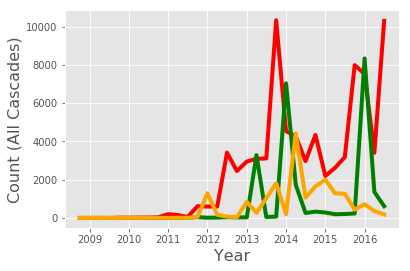

In [65]:
for veracity,date2count in veracity2date2count.items():
    date_count=list(date2count.items())
    date_count.sort(key=lambda x:x[0])
    x=[d for d,c in date_count if (d.year!=2016 or d.month<10)]
    y=[c for d,c in date_count if (d.year!=2016 or d.month<10)]
    plt.plot(x,y,color=veracity2color[veracity],linewidth=lw)
plt.xlabel('Year',fontsize=16)
plt.ylabel("Count (All Cascades)",fontsize=16)
plt.show()

## Figrue 1D

In [66]:
veracity2rid2count=defaultdict(lambda: defaultdict(int))
for cascade,metadata in cascade_id2metadata.items():
    veracity=metadata['veracity']
    rid=metadata['rumor_id']
    category=metadata['rumor_category']
    if category!='Politics':
        continue
    veracity2rid2count[veracity][rid]+=1

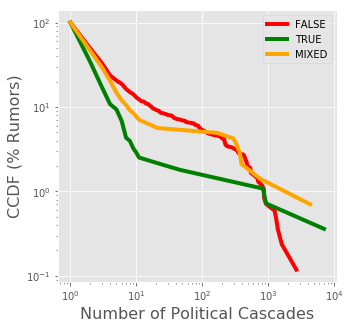

In [67]:
plt.figure(figsize = [5,5])

for veracity,rid2count in veracity2rid2count.items():
    rid_count=list(rid2count.items())
    rid_count.sort(key=lambda x:x[1], reverse=True)
    y=[count for rid,count in rid_count]
    total=float(len(rid_count))
    xf=[]
    pf=[]
    y.sort()
    counts=list(set(y))
    counts.sort()
    for d in counts:
        ind=y.index(d)
        count=len(y[ind:])
        p=(count/float(total)) * 100
        xf.append(d)
        pf.append(p)
    plt.plot(xf,pf,'-',color=veracity2color[veracity],linewidth=lw, label=veracity)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Number of Political Cascades",fontsize=16)
plt.ylabel("CCDF (% Rumors)",fontsize=16)
plt.xticks(rotation='horizontal')
plt.legend()
plt.show()

## Figrue 1E

In [68]:
veracity2date2count=defaultdict(lambda: defaultdict(int))
for cascade,metadata in cascade_id2metadata.items():
    veracity=metadata['veracity']
    category=metadata['rumor_category']
    if category!='Politics':
        continue
    y,m,d = metadata['start_date'][:3]
    date=datetime.date(y,m,d)
    date = quarter_year(date)
    veracity2date2count[veracity][date]+=1

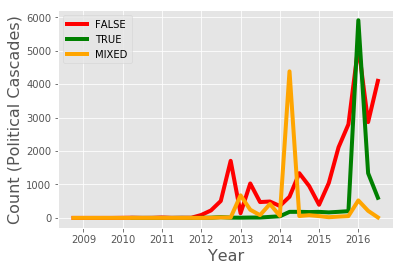

In [69]:
for veracity,date2count in veracity2date2count.items():
    date_count=list(date2count.items())
    date_count.sort(key=lambda x:x[0])
    x=[d for d,c in date_count if (d.year!=2016 or d.month<10)]
    y=[c for d,c in date_count if (d.year!=2016 or d.month<10)]
    plt.plot(x,y,color=veracity2color[veracity],linewidth=lw, label = veracity)
plt.xlabel('Year',fontsize=16)
plt.ylabel("Count (Political Cascades)",fontsize=16)
plt.legend()
plt.show()

## Figrue 1F

In [70]:
def kit(x, pos):
    val_str = '{:g}'.format(x)
    if val_str=='5000':
        return '5K'
    elif val_str=='15000':
        return '15K'
    elif val_str=='25000':
        return '25K'
    elif val_str=='35000':
        return '35K'
    elif val_str=='45000':
        return '45K'
    elif val_str=='10000':
        return '10K'
    elif val_str=='20000':
        return '20K'
    elif val_str=='30000':
        return '30K'
    elif val_str=='40000':
        return '40K'
    elif val_str=='50000':
        return '50K'
    elif val_str=='60000':
        return '60K'
    elif val_str=='100000':
        return '100K'
    else:
        return val_str

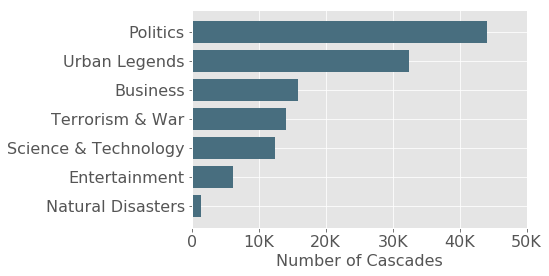

In [71]:
category2count=defaultdict(int)
for cascade,metadata in cascade_id2metadata.items():
    category=metadata['rumor_category']
    category2count[category]+=1
cat_count=list(category2count.items())
cat_count.sort(key=lambda x:x[1], reverse=True)
y=[count for cat,count in cat_count]
x=['Politics','Urban Legends','Business','Terrorism & War',
   'Science & Technology','Entertainment','Natural Disasters']
x.reverse()
y.reverse()
width = 0.015
pos=[ 0.17 , 0.19 , 0.21 , 0.23 , 0.25 , 0.27 , 0.29]
ax = plt.subplot(111)
formatter = plt.FuncFormatter(kit)
ax.xaxis.set_major_formatter(formatter)
ax.barh(pos,y,width, align='center',color ='#486E7F' )
plt.yticks(pos, x,fontsize=fs)
plt.ylim([0.155,0.305])
ax.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel("Number of Cascades",fontsize=16)
plt.xticks(rotation='horizontal')
ax.set_xticks([0, 10000, 20000,30000,40000,50000])
plt.show()

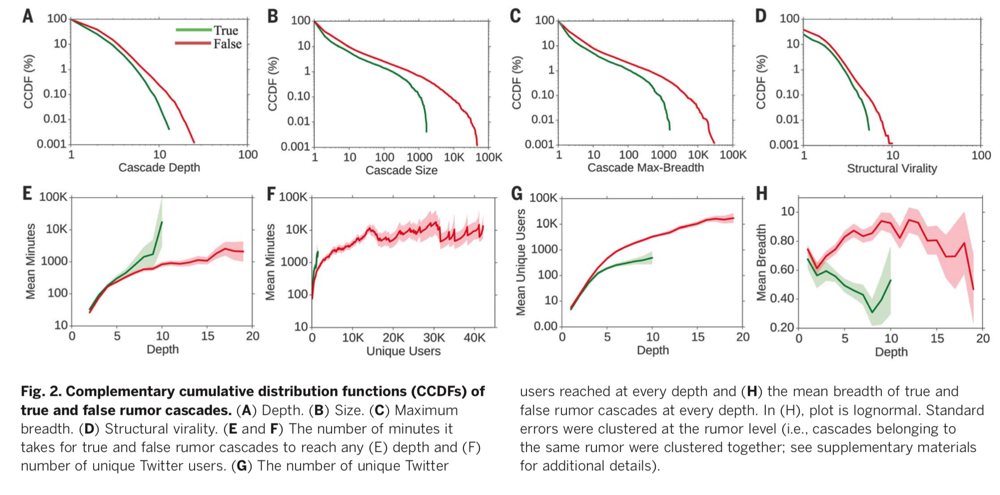

## Figrue 2A

In [72]:
def calc_robust_sem(y_r,clusters):
    '''
    calculated the cluster robust semof array
    '''
    x_r=[1]*len(y_r)
    res = sm.OLS(y_r,x_r).fit(cov_type='cluster',cov_kwds={'groups': clusters})
    robust_sem=res.bse[0]
    return robust_sem

In [73]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from scipy.spatial.distance import cosine

veracity2depths=defaultdict(list)
veracity2clusters=defaultdict(list)
for cascade,metadata in cascade_id2metadata.items():
    veracity=metadata['veracity']
    rid=metadata['rumor_id']
    depth=metadata['depth']+1 #adding one for smoothing purposes
    veracity2depths[veracity].append(depth)
    veracity2clusters[veracity].append(rid)
print ('##############################')
print ('Depth Stats. FALSE/TRUE/MIXED')
print ('Mean (log)',np.mean(np.log10(veracity2depths['FALSE'])),
       np.mean(np.log10(veracity2depths['TRUE'])),
       np.mean(np.log10(veracity2depths['MIXED'])) )
print ('Robust SEM (log)',calc_robust_sem(np.log10(veracity2depths['FALSE']),veracity2clusters['FALSE']),\
    calc_robust_sem(np.log10(veracity2depths['TRUE']),veracity2clusters['TRUE']),\
    calc_robust_sem(np.log10(veracity2depths['MIXED']),veracity2clusters['MIXED']) )
print  ("KS test (false and true):",stats.ks_2samp(veracity2depths['FALSE'],veracity2depths['TRUE']))


##############################
Depth Stats. FALSE/TRUE/MIXED
Mean (log) 0.1556960624002555 0.09893083525906188 0.08346135679142731
Robust SEM (log) 0.013497066409141468 0.018299043331016847 0.017128365894582633
KS test (false and true): Ks_2sampResult(statistic=0.13375145004382005, pvalue=1.0355754664082545e-293)


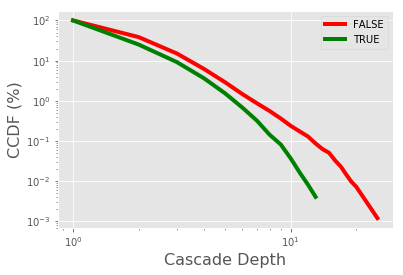

In [74]:
'''
FIGURE 2A
CCDF of depth for all rumors
'''
ax = plt.subplot(111)
ax.set_xscale('log')
ax.set_yscale('log')

for veracity,depths in veracity2depths.items():
    if veracity=='MIXED':
        continue
    total=float(len(depths))
    xf=[]
    pf=[]
    depths.sort()
    counts=list(set(depths))
    counts.sort()
    for d in counts:
        ind=depths.index(d)
        count=len(depths[ind:])
        p=(count/float(total)) * 100
        xf.append(d)
        pf.append(p)
    ax.plot(xf,pf,color=veracity2color[veracity],linewidth=lw, label=veracity)
    
plt.xlabel("Cascade Depth",fontsize=16)
plt.ylabel("CCDF (%)",fontsize=16)
ax.tick_params(axis='both', which='major')
plt.xticks(rotation='horizontal')
plt.legend()
plt.show()

## Figrue 2B

In [75]:
veracity2sizes=defaultdict(list)
for cascade,metadata in cascade_id2metadata.items():
    veracity=metadata['veracity']
    size=metadata['size']
    veracity2sizes[veracity].append(size)
    
print ('##############################')
print ('Size Stats. FALSE/TRUE/MIXED')
print ('Mean (log)',np.mean(np.log10(veracity2sizes['FALSE'])),
np.mean(np.log10(veracity2sizes['TRUE'])),np.mean(np.log10(veracity2sizes['MIXED'])))
print ('Robust SEM (log)',calc_robust_sem(np.log10(veracity2sizes['FALSE']),veracity2clusters['FALSE']),\
    calc_robust_sem(np.log10(veracity2sizes['TRUE']),veracity2clusters['TRUE']),\
    calc_robust_sem(np.log10(veracity2sizes['MIXED']),veracity2clusters['MIXED']))
print  ("KS test (false and true):",stats.ks_2samp(veracity2sizes['FALSE'],
                                                  veracity2sizes['TRUE']))

##############################
Size Stats. FALSE/TRUE/MIXED
Mean (log) 0.3128844655467964 0.18638413095627063 0.15980231469248984
Robust SEM (log) 0.030545758073239764 0.043060018558942904 0.03644323338242026
KS test (false and true): Ks_2sampResult(statistic=0.13375145004382005, pvalue=1.0355754664082545e-293)


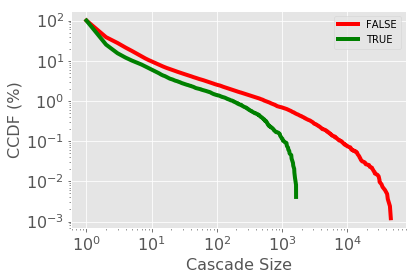

In [76]:
'''
FIGURE 2B
CCDF of size for all rumors
'''
ax = plt.subplot(111)
ax.set_xscale('log')
ax.set_yscale('log')


for veracity,sizes in veracity2sizes.items():
    if veracity=='MIXED':
        continue
    total=float(len(sizes))
    xf=[]
    pf=[]
    sizes.sort()
    counts=list(set(sizes))
    counts.sort()
    for d in counts:
        ind=sizes.index(d)
        count=len(sizes[ind:])
        p=(count/float(total)) * 100
        xf.append(d)
        pf.append(p)
    ax.plot(xf,pf,color=veracity2color[veracity],linewidth=lw, label=veracity)
plt.xlabel("Cascade Size",fontsize=16)
plt.ylabel("CCDF (%)",fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.xticks(rotation='horizontal')
plt.legend()
plt.show()

## Figrue 2C

In [78]:
veracity2breadths=defaultdict(list)
for cascade,metadata in cascade_id2metadata.items():
    veracity=metadata['veracity']
    breadth=metadata['max_breadth']
    veracity2breadths[veracity].append(breadth)
print ('Max-Breadth Stats. FALSE/TRUE/MIXED')
print ('Mean (log)',np.mean(np.log10(veracity2breadths['FALSE'])),
        np.mean(np.log10(veracity2breadths['TRUE'])),
        np.mean(np.log10(veracity2breadths['MIXED'])))
print ('Robust SEM (log)',calc_robust_sem(np.log10(veracity2breadths['FALSE']),veracity2clusters['FALSE']),\
    calc_robust_sem(np.log10(veracity2breadths['TRUE']),veracity2clusters['TRUE']),\
    calc_robust_sem(np.log10(veracity2breadths['MIXED']),veracity2clusters['MIXED']))
print ( "KS test (false and true):",stats.ks_2samp(veracity2breadths['FALSE'],
                                                  veracity2breadths['TRUE']))

Max-Breadth Stats. FALSE/TRUE/MIXED
Mean (log) 0.28945595089678533 0.1722858736978243 0.14758253463390314
Robust SEM (log) 0.028632082656673146 0.04012005512083698 0.03313159503683722
KS test (false and true): Ks_2sampResult(statistic=0.13375145004382005, pvalue=1.0355754664082545e-293)


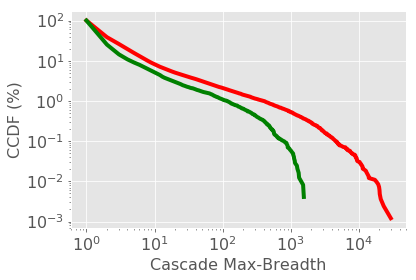

In [79]:
'''
FIGURE 2C
CCDF of max-breadth for all rumors
'''
ax = plt.subplot(111)
ax.set_xscale('log')
ax.set_yscale('log')

for veracity,breadths in veracity2breadths.items():
    if veracity=='MIXED':
        continue
    total=float(len(breadths))
    xf=[]
    pf=[]
    breadths.sort()
    counts=list(set(breadths))
    counts.sort()
    for d in counts:
        ind=breadths.index(d)
        count=len(breadths[ind:])
        p=(count/float(total)) * 100
        xf.append(d)
        pf.append(p)
    ax.plot(xf,pf,color=veracity2color[veracity],linewidth=lw)
plt.xlabel("Cascade Max-Breadth",fontsize=16)
plt.ylabel("CCDF (%)",fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.xticks(rotation='horizontal')
plt.show()

## Figrue 2D

In [80]:
veracity2viralities=defaultdict(list)
veracity2virality_clusters=defaultdict(list)
for cascade,metadata in cascade_id2metadata.items():
    veracity=metadata['veracity']
    virality=metadata['virality']
    rid=metadata['rumor_id']
    veracity2viralities[veracity].append(virality)
    if virality!=None:
        veracity2virality_clusters[veracity].append(rid)

print ('Virality Stats. FALSE/TRUE/MIXED')
print ('Mean (log)',np.mean(np.log10([e for e in veracity2viralities['FALSE'] if e!=None])),\
    np.mean(np.log10([e for e in veracity2viralities['TRUE'] if e!=None])),np.mean(np.log10([e for e in veracity2viralities['MIXED'] if e!=None])))
print( 'Robust SEM (log)',calc_robust_sem(np.log10([e for e in veracity2viralities['FALSE'] if e!=None]),veracity2virality_clusters['FALSE']),\
    calc_robust_sem(np.log10([e for e in veracity2viralities['TRUE'] if e!=None]),veracity2virality_clusters['TRUE']),\
    calc_robust_sem(np.log10([e for e in veracity2viralities['MIXED'] if e!=None]),veracity2virality_clusters['MIXED']))
print  ("KS test (false and true):",stats.ks_2samp([e for e in veracity2viralities['FALSE'] if e!=None],[e for e in veracity2viralities['TRUE'] if e!=None]))

Virality Stats. FALSE/TRUE/MIXED
Mean (log) 0.18798671457451818 0.16411901253767572 0.164497158915854
Robust SEM (log) 0.007429204731023393 0.019567595350724994 0.016683679609004035
KS test (false and true): Ks_2sampResult(statistic=0.1070390510843568, pvalue=6.826673800095857e-52)


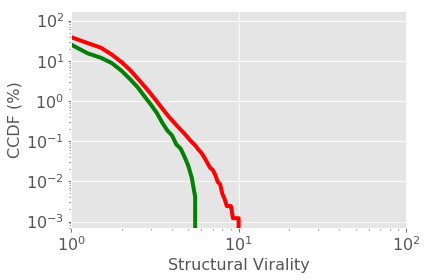

In [81]:
'''
FIGURE 2D
CCDF of strucural virality for all rumors
'''

import bisect

ax = plt.subplot(111)
ax.set_xscale('log')
ax.set_yscale('log')


for veracity,viralities in veracity2viralities.items():
    if veracity=='MIXED':
        continue
    xf=[]
    pf=[]
    viralities=[e if e!=None else 0 for e in viralities]
    total=float(len(viralities))
    viralities.sort()
    counts=[]
    c=min(viralities)
    step=0.25
    while c<max(viralities)+step:
        counts.append(c)
        c+=step
    counts.sort()
    for d in counts:
        ind=bisect.bisect_left(viralities,d)
        count=len(viralities[ind:])
        p=(count/float(total)) * 100
        xf.append(d)
        pf.append(p)
    ax.plot(xf,pf,color=veracity2color[veracity],linewidth=lw)
plt.xlabel("Structural Virality",fontsize=16)
plt.ylabel("CCDF (%)",fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.xticks(rotation='horizontal')
plt.xlim([1,100])
plt.show()

## Figrue 2E

In [148]:
veracity2depth2times=defaultdict(lambda: defaultdict(list))
veracity2depth2clusters=defaultdict(lambda: defaultdict(list))
for cascade,metadata in cascade_id2metadata.items():
    veracity=metadata['veracity']
    rid=metadata['rumor_id']
    depth2time=metadata['depth2time']
    for depth,time_ in depth2time.items():
        veracity2depth2times[veracity][depth].append(time_)
        veracity2depth2clusters[veracity][depth].append(rid)

In [150]:
def lognormal(x,pos):
    if x<1:
        return '%1.2f' % (x)
    else:
        z=10**x
        if int(z)==z:
            z=str(int(z))
        if z=='10000':
            return '10K'
        elif z=='100000':
            return '100K'
        elif z=='1000000':
            return '1000K'
        else:
            return z

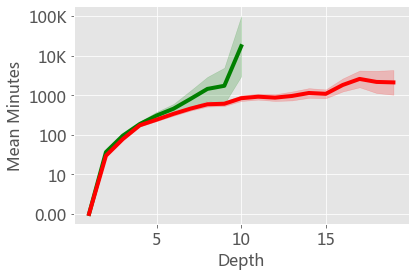

In [156]:

'''
FIGURE 2E
depth vs time for all rumors
'''
from pylab import MaxNLocator

ax = plt.subplot(111)
formatter = plt.FuncFormatter(lognormal)
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
for veracity in ['TRUE','FALSE']:
    depth2times=veracity2depth2times[veracity]
    x=[]
    y=[]
    errors=[]
    for d,times in depth2times.items():
        if len(times)>thresh: #thresh is set to 2 in settings.py. There needs to be at least two points for each depth
            x.append(d)
            times=np.array(times)/60.0 ##convert to minutes
            y.append(np.mean(np.log10(times+1)))
            ##Calculting robust SEM##
            clusters=veracity2depth2clusters[veracity][d]
            y_r=np.log10(times+1)
            robust_sem=calc_robust_sem(y_r,clusters)
            ####
            errors.append(robust_sem)
    y=np.array(y)
    x=np.array(x)
    errors=np.array(errors)
    plt.plot(x,y,color=veracity2color[veracity],linewidth=lw)
    plt.fill_between(x, y-errors, y+errors,alpha=0.2,color=veracity2color[veracity])
plt.xlabel('Depth',fontsize=16)
plt.ylabel("Mean Minutes",fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.show()

## Figrue 2F

In [157]:
veracity2uu2times=defaultdict(lambda: defaultdict(list))
veracity2uu2clusters=defaultdict(lambda: defaultdict(list))
for cascade,metadata in cascade_id2metadata.items():
    veracity=metadata['veracity']
    rid=metadata['rumor_id']
    uu2time=metadata['uu2time']
    for uu,time_ in uu2time.items():
        veracity2uu2times[veracity][uu].append(time_)
        veracity2uu2clusters[veracity][uu].append(rid)


In [158]:
def kit2(x, pos):
    val_str = '{:g}'.format(x)
    if val_str=='10000':
        return '10K'
    elif val_str=='20000':
        return '20K'
    elif val_str=='30000':
        return '30K'
    elif val_str=='40000':
        return '40K'
    elif val_str=='50000':
        return '50K'
    elif val_str=='5000':
        return '5K'
    elif val_str=='15000':
        return '15K'
    elif val_str=='25000':
        return '25K'
    elif val_str=='35000':
        return '35K'
    elif val_str=='45000':
        return '45K'
    elif val_str=='10000':
        return '10K'
    elif val_str=='20000':
        return '20K'
    elif val_str=='30000':
        return '30K'
    elif val_str=='40000':
        return '40K'
    elif val_str=='50000':
        return '50K'
    elif val_str=='60000':
        return '60K'
    elif val_str=='100000':
        return '100K'
    else:
        return val_str

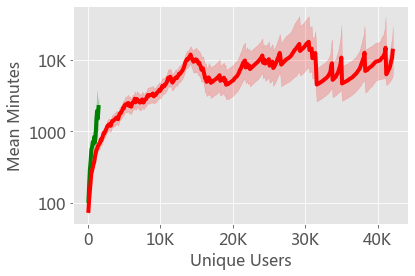

In [159]:
'''
FIGURE 2F
unique users vs time for all rumors
'''
ax = plt.subplot(111)
formatter = plt.FuncFormatter(lognormal)
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
formatter_x = plt.FuncFormatter(log_10_product)
ax.xaxis.set_major_formatter(formatter_x)

for veracity in ['TRUE','FALSE']:
    uu2times=veracity2uu2times[veracity]
    x=[]
    y=[]
    errors=[]
    max_uu=max(uu2times.keys())
    for uu,times in uu2times.items():
        if len(times)>thresh:
            if uu%100!=0 and uu!=max_uu: #we are binning every 100 , otherwise there would be too many points in the plot and it would not load quickly.
                continue
            x.append(uu)
            times=np.array(times)/60.0 #convert to minutes
            y.append(np.mean(np.log10(times)))
            ##Robust SEM##
            clusters=veracity2uu2clusters[veracity][uu]
            y_r=np.log10(times)
            robust_sem=calc_robust_sem(y_r,clusters)
            ####
            errors.append(robust_sem)
    y=np.array(y)
    x=np.array(x)
    errors=np.array(errors)
    ax.plot(x,y,color=veracity2color[veracity],linewidth=lw)
    ax.fill_between(x, y-errors, y+errors,alpha=0.2,color=veracity2color[veracity])
plt.xlabel('Unique Users',fontsize=16)
plt.ylabel("Mean Minutes",fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.set_ticks(np.arange(0,45000,10000))
formatter=plt.FuncFormatter(kit2)
ax.xaxis.set_major_formatter(formatter)

## Figrue 2G

In [160]:
veracity2depth2uus=defaultdict(lambda: defaultdict(list))
for cascade,metadata in cascade_id2metadata.items():
    veracity=metadata['veracity']
    depth2uu=metadata['depth2uu']
    for depth,uu in depth2uu.items():
        veracity2depth2uus[veracity][depth].append(uu)

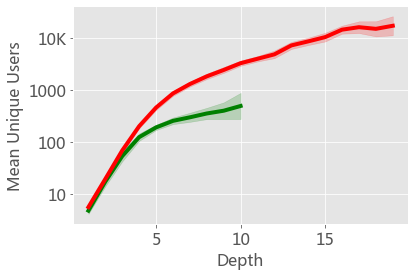

In [162]:
'''
FIGURE 2G
depth vs unique users for all rumors
'''
ax = plt.subplot(111)
formatter = plt.FuncFormatter(lognormal)
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))


for veracity in ['TRUE','FALSE']:
    depth2uus=veracity2depth2uus[veracity]
    x=[]
    y=[]
    errors=[]
    for d,uus in depth2uus.items():
        if len(uus)>thresh:
            x.append(d)
            uus=np.array(uus)
            y.append(np.mean(np.log10(uus)))
            ##Robust SEM##
            clusters=veracity2depth2clusters[veracity][d]
            y_r=np.log10(uus)
            robust_sem=calc_robust_sem(y_r,clusters)
            ####
            errors.append(robust_sem)
    y=np.array(y)
    x=np.array(x)
    errors=np.array(errors)
    plt.plot(x,y,color=veracity2color[veracity],linewidth=lw)
    plt.fill_between(x, y-errors, y+errors,alpha=0.2,color=veracity2color[veracity])
plt.xlabel('Depth',fontsize=16)
plt.ylabel("Mean Unique Users",fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.show()

## Figrue 2H

In [163]:
def lognormal2(x,pos):
    if x<1:
        return '%1.2f' % (x)
    else:
        z='%1i' % (10**x)
        return z

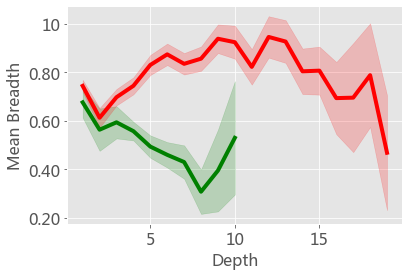

In [164]:
'''
FIGURE 2H
depth vs mean max-breadth for all rumors
'''

ax = plt.subplot(111)
formatter = plt.FuncFormatter(lognormal2)
ax.yaxis.set_major_formatter(formatter)

veracity2depth2breadths=defaultdict(lambda: defaultdict(list))
for cascade,metadata in cascade_id2metadata.items():
    veracity=metadata['veracity']
    depth2breadth=metadata['depth2breadth']
    for depth,breadth in depth2breadth.items():
        veracity2depth2breadths[veracity][depth].append(breadth)

for veracity in ['TRUE','FALSE']:
    depth2breadths=veracity2depth2breadths[veracity]
    x=[]
    y=[]
    errors=[]
    for d,breadths in depth2breadths.items():
        if len(breadths)>thresh:
            x.append(d)
            breadths=np.array(breadths)
            y.append(np.mean(np.log10(breadths)))
            ##Robust SEM##
            clusters=veracity2depth2clusters[veracity][d]
            y_r=np.log10(breadths)
            robust_sem=calc_robust_sem(y_r,clusters)
            ####
            errors.append(robust_sem)
    y=np.array(y)
    x=np.array(x)
    errors=np.array(errors)
    plt.plot(x,y,color=veracity2color[veracity],linewidth=lw)
    plt.fill_between(x, y-errors, y+errors,alpha=0.2,color=veracity2color[veracity])
plt.xlabel('Depth',fontsize=16)
plt.ylabel("Mean Breadth",fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)

## Figrue 4A

In [165]:
'''
FIGURE 4A
user stats for false and true cascades
'''
veracity2followers={}
veracity2followees={}
veracity2account_age={}
veracity2engagement={}
veracity2verified={}

for cascade,metadata in cascade_id2metadata.items():
    veracity=metadata['veracity']

    followers=metadata['num_followers_list']
    followers=[e+epsilon for e in followers if e!=None] #smoothing
    followers_list=veracity2followers.get(veracity,[])
    followers_list.extend(followers)
    veracity2followers[veracity]=followers_list

    followees=metadata['num_followees_list']
    followees=[e+epsilon for e in followees if e!=None] #smoothing
    followees_list=veracity2followees.get(veracity,[])
    followees_list.extend(followees)
    veracity2followees[veracity]=followees_list

    account_age=metadata['accountage_list']
    account_age=[e for e in account_age if e!=None] #smoothing
    account_age_list=veracity2account_age.get(veracity,[])
    account_age_list.extend(account_age)
    veracity2account_age[veracity]=account_age_list

    engagement=metadata['engagement_list']
    engagement=[e+epsilon for e in engagement if e!=None] #smoothing
    engagement_list=veracity2engagement.get(veracity,[])
    engagement_list.extend(engagement)
    veracity2engagement[veracity]=engagement_list

    verified=metadata['verified_list']
    verified=[e for e in verified if e!=None] #smoothing
    verified_list=veracity2verified.get(veracity,[])
    verified_list.extend(verified)
    veracity2verified[veracity]=verified_list

D,p=stats.ks_2samp(veracity2followers['FALSE'],veracity2followers['TRUE'])
row1=[np.median(veracity2followers['FALSE']),np.median(veracity2followers['TRUE']),
     np.mean(veracity2followers['FALSE']),np.mean(veracity2followers['TRUE']),
     np.mean(np.log10(veracity2followers['FALSE'])),np.mean(np.log10(veracity2followers['TRUE'])),
     np.std(np.log10(veracity2followers['FALSE'])),np.std(np.log10(veracity2followers['TRUE'])),
     D,p]

D,p=stats.ks_2samp(veracity2followees['FALSE'],veracity2followees['TRUE'])
row2=[np.median(veracity2followees['FALSE']),np.median(veracity2followees['TRUE']),
     np.mean(veracity2followees['FALSE']),np.mean(veracity2followees['TRUE']),
     np.mean(np.log10(veracity2followees['FALSE'])),np.mean(np.log10(veracity2followees['TRUE'])),
     np.std(np.log10(veracity2followees['FALSE'])),np.std(np.log10(veracity2followees['TRUE'])),
     D,p]

D,p=stats.ks_2samp(veracity2verified['FALSE'],veracity2verified['TRUE'])
row3=[np.median(veracity2verified['FALSE']),np.median(veracity2verified['TRUE']),
     np.mean(veracity2verified['FALSE']),np.mean(veracity2verified['TRUE']),
     np.mean(np.log10(veracity2verified['FALSE'])),np.mean(np.log10(veracity2verified['TRUE'])),
     np.std(np.log10(veracity2verified['FALSE'])),np.std(np.log10(veracity2verified['TRUE'])),
     D,p]

D,p=stats.ks_2samp(veracity2engagement['FALSE'],veracity2engagement['TRUE'])
row4=[np.median(veracity2engagement['FALSE']),np.median(veracity2engagement['TRUE']),
     np.mean(veracity2engagement['FALSE']),np.mean(veracity2engagement['TRUE']),
     np.mean(np.log10(veracity2engagement['FALSE'])),np.mean(np.log10(veracity2engagement['TRUE'])),
     np.std(np.log10(veracity2engagement['FALSE'])),np.std(np.log10(veracity2engagement['TRUE'])),
     D,p]

D,p=stats.ks_2samp(veracity2account_age['FALSE'],veracity2account_age['TRUE'])
row5=[np.median(veracity2account_age['FALSE']),np.median(veracity2account_age['TRUE']),
     np.mean(veracity2account_age['FALSE']),np.mean(veracity2account_age['TRUE']),
     np.mean(np.log10(veracity2account_age['FALSE'])),np.mean(np.log10(veracity2account_age['TRUE'])),
     np.std(np.log10(veracity2account_age['FALSE'])),np.std(np.log10(veracity2account_age['TRUE'])),
     D,p]

import numpy as np
import pandas as pd
table=np.array([np.array(row1),np.array(row2),np.array(row3),np.array(row4),np.array(row5)])
table=pd.DataFrame(table,["followers","followees","verified","engagement","account age"],
                   ["median-false","median-true","mean-false","mean-true","mean(log)-false","mean(log)-true","stdv(log)-false","stdv(log)-true","D","p"])
print(table)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


             median-false  median-true   mean-false    mean-true  \
followers      410.000000   466.000000  2234.383147  5240.214581   
followees      383.000000   509.000000  1002.454116  1707.112337   
verified         0.000000     0.000000     0.001859     0.006348   
engagement       9.518318     9.537317    19.695038    24.645378   
account age    982.000000  1214.000000  1072.745442  1269.492351   

             mean(log)-false  mean(log)-true  stdv(log)-false  stdv(log)-true  \
followers           2.616351        2.679380         0.694385        0.876284   
followees           2.594260        2.716004         0.846228        0.959206   
verified                -inf            -inf              NaN             NaN   
engagement          0.906447        0.898853         0.654019        0.758728   
account age         2.903574        2.967450         0.388340        0.417382   

                    D         p  
followers    0.104138  0.000000  
followees    0.135970  0.000000  
ve

## Figrue 4B

In [168]:
fin=open(regression_file,'r')
lines=fin.readlines()
fin.close()
regression_data=[] #[cluster,was_retweeted,folllowers,followees,verified,account_age,engagement,falsehood]
for line in lines:
    line=line.replace('\n','')
    regression_data.append(eval(line))

In [169]:
'''
FIGURE 4B
logistic regression
'''
y=[]
followers_list=[]
followees_list=[]
verified_list=[]
account_age_list=[]
engagement_list=[]
falsehood_list=[]
intercept_list=[]
clusters_list=[]
for row in regression_data:
    clusters_list.append(row[0])
    y.append(row[1])
    followers_list.append(row[2])
    followees_list.append(row[3])
    verified_list.append(row[4])
    account_age_list.append(row[5])
    engagement_list.append(row[6])
    falsehood_list.append(row[7])
    intercept_list.append(1)

x={'followers':pd.Series(followers_list),
   'followees':pd.Series(followees_list),
   'verified':pd.Series(verified_list),
   'account_age':pd.Series(account_age_list),
   'engagement':pd.Series(engagement_list),
   'falsehood':pd.Series(falsehood_list),
   'intercept':pd.Series(intercept_list)}
x=pd.DataFrame(x)

In [170]:
x.head()

,followers,followees,verified,account_age,engagement,falsehood,intercept
0,164,236,0,1326,7.092405,1,1
1,870,1999,0,988,8.394500,1,1
2,452,1982,0,1190,6.729679,1,1
3,5,55,0,682,0.186418,1,1
4,95,129,0,1496,1.425915,1,1


In [171]:
logit = sm.Logit(y, x)
result=logit.fit(cov_type='cluster',cov_kwds={'groups': clusters_list})
print (result.summary())
print ("odds ratios:")
print (np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.461037
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:              3724197
Model:                          Logit   Df Residuals:                  3724190
Method:                           MLE   Df Model:                            6
Date:                Mon, 10 Aug 2020   Pseudo R-squ.:                 0.03369
Time:                        23:54:03   Log-Likelihood:            -1.7170e+06
converged:                       True   LL-Null:                   -1.7769e+06
Covariance Type:              cluster   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
followers    5.192e-05   7.77e-06      6.682      0.000    3.67e-05    6.72e-05
followees   -1.639e-05   

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:247: RuntimeWarning: divide by zero encountered in true_divide
  return (2*p - 1) / v**2
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:539: RuntimeWarning: invalid value encountered in multiply
  tmp = score_factor * tmp
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:581: RuntimeWarning: invalid value encountered in multiply
  np.multiply(self.exog.T, factor, out=tmp.T)


Deviance stats nan


In [ ]:
# ### Goodness of fit checks
# formula = "y ~ followers+followees+verified+account_age+engagement+falsehood"
# logit = smf.glm(formula=formula, data=x, family=sm.families.Binomial())
# result=logit.fit(cov_type='cluster',cov_kwds={'groups': clusters_list})
# print  ("Deviance stats",1 - stats.chi2.cdf(result.deviance, result.df_resid))

# Figure 4C&E

In [7]:
tid2rid_veracity_tweettopics_backgroundtopics={}
import csv
with open(topics_file,'r') as f:
    reader=csv.reader(f)
    row_num=0
    for row in reader:
        if row_num==0:
            header=row
        else:
            tid=int(row[0])
            rid=row[1]
            veracity=row[2]
            tweet_topics=[]
            background_topics=[]
            for i in range(3,201):
                tweet_topics.append(float(row[i]))
            for i in range(203,401):
                background_topics.append(float(row[i]))
            tid2rid_veracity_tweettopics_backgroundtopics[tid]=(rid,veracity,tweet_topics,background_topics)
        row_num+=1

In [17]:
from scipy.spatial.distance import cosine
import math

def calc_inf_uniq(back_topic,tid_topic):
    '''
    information uniqueness
    '''
    iu=cosine(back_topic,tid_topic)
    if math.isnan(iu):
        iu=.99
    return iu

def calc_kl(q,p):
    """Kullback-Leibler divergence D(P || Q) for discrete distributions
    p and q both must sum up to 1.
    """
    assert 1.0-sum(q)<1e9 and 1.0-sum(p)<1e9
    p = np.asarray(p, dtype=np.float)
    q = np.asarray(q, dtype=np.float)
    kl=np.sum(np.where(p != 0, p * np.log(p / q), 0))
    return kl

def calc_bhatta(back_topic,tid_topic):
    """
    bhattacharyya distance
    """
    h1=np.mean(tid_topic)
    n=len(tid_topic)

    h2= np.mean(back_topic);
    score = 0;
    for i in range(n):
        score += math.sqrt( tid_topic[i] * back_topic[i] );
    try:
        score = math.sqrt( 1 - ( 1 / math.sqrt(h1*h2*n*n) ) * score );
    except:
        score=.99
    bhat=score
    return bhat

In [18]:
'''
FIGUREs 4C, 4E
Novelty
'''
veracity2novelty_metric2scores={}
veracity2clusters_novelty={}
for tweet_id,rid_veracity_tweettopics_backgroundtopics in tid2rid_veracity_tweettopics_backgroundtopics.items():
    veracity=rid_veracity_tweettopics_backgroundtopics[1]
    rumor_id=rid_veracity_tweettopics_backgroundtopics[0]
    tweettopics=rid_veracity_tweettopics_backgroundtopics[2]
    backgroundtopics=rid_veracity_tweettopics_backgroundtopics[3]

    iu=calc_inf_uniq(backgroundtopics,tweettopics)
    klv=(calc_kl(backgroundtopics,tweettopics)+calc_kl(tweettopics,backgroundtopics))/2.0
    bhs=calc_bhatta(backgroundtopics,tweettopics)

    novelty_metrics2scores=veracity2novelty_metric2scores.get(veracity,{})
    scores=novelty_metrics2scores.get('IU',[])
    scores.append(iu)
    novelty_metrics2scores['IU']=scores

    scores=novelty_metrics2scores.get('KL',[])
    scores.append(klv)
    novelty_metrics2scores['KL']=scores

    scores=novelty_metrics2scores.get('BD',[])
    scores.append(bhs)
    novelty_metrics2scores['BD']=scores
    veracity2novelty_metric2scores[veracity]=novelty_metrics2scores

    clusters_novelty=veracity2clusters_novelty.get(veracity,[])
    clusters_novelty.append(rumor_id)
    veracity2clusters_novelty[veracity]=clusters_novelty



In [22]:
def no_zero(x, pos):
    val_str = '{:g}'.format(x)
    if np.abs(x) > 0 and np.abs(x) < 1:
        return val_str.replace("0", "", 1)
    else:
        return val_str
    
def calc_robust_sem(y_r,clusters):
    '''
    calculated the cluster robust semof array
    '''
    x_r=[1]*len(y_r)
    res = sm.OLS(y_r,x_r).fit(cov_type='cluster',cov_kwds={'groups': clusters})
    robust_sem=res.bse[0]
    return robust_sem

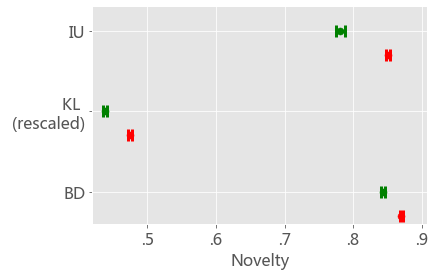

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

ax = plt.subplot(111)
formatter = plt.FuncFormatter(no_zero)
ax.xaxis.set_major_formatter(formatter)
offset=0
max_kls=max(max(veracity2novelty_metric2scores['TRUE']['KL']),max(veracity2novelty_metric2scores['FALSE']['KL']))
for veracity in ['TRUE','FALSE']:
    ius=veracity2novelty_metric2scores[veracity]['IU']
    kls=veracity2novelty_metric2scores[veracity]['KL']
    kls_scaled=np.array(kls)/max_kls
    bahs=veracity2novelty_metric2scores[veracity]['BD']
    means=np.array([np.mean(ius),np.mean(kls_scaled),np.mean(bahs)]) #for visualization purposes we rescale the KL
    ##Robust SEM##
    clusters= veracity2clusters_novelty[veracity]
    y_r=ius
    ius_robust_sem=calc_robust_sem(y_r,clusters)
    y_r=kls_scaled
    kls_robust_sem=calc_robust_sem(y_r,clusters)
    y_r=bahs
    bahs_robust_sem=calc_robust_sem(y_r,clusters)
    errors=np.array([ius_robust_sem,kls_robust_sem,bahs_robust_sem])
    ####
    y=[2+offset,1+offset,0+offset]
    offset-=0.30
    ax.scatter(means,y,s=50,color=veracity2color[veracity])
    ax.errorbar(means, y, xerr=errors,fmt='.',color=veracity2color[veracity],elinewidth=3,capsize=6,capthick=3)
labels = ['IU','KL \n (rescaled)','BD']
plt.yticks([2,1,0], labels,fontsize=16)
plt.xlabel("Novelty",fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.ylim([-.4,2.3])
plt.xlim([.42,.908])
plt.show()

In [29]:
from scipy import stats
import numpy as np
import pandas as pd

table=[]
for metric in ['IU','KL','BD']:
    D,p=stats.ks_2samp(veracity2novelty_metric2scores['FALSE'][metric],veracity2novelty_metric2scores['TRUE'][metric])
    row=[np.mean(veracity2novelty_metric2scores['FALSE'][metric]),np.mean(veracity2novelty_metric2scores['TRUE'][metric]),
         np.var(veracity2novelty_metric2scores['FALSE'][metric]),np.var(veracity2novelty_metric2scores['TRUE'][metric]),
         D,p]
    table.append(np.array(row))
table=np.array(table)
table=pd.DataFrame(table,['iu','kl','bd'],
                   ["mean-false","mean-true","var-false","var-true","D","p"])
print(table)

    mean-false  mean-true  var-false  var-true         D    p
iu    0.851124   0.781358   0.005177  0.007246  0.456989  0.0
kl    4.493953   4.146605   0.161795  0.094793  0.433191  0.0
bd    0.870134   0.843977   0.000840  0.000771  0.415289  0.0


# Figure 4D&F

In [35]:
tid2emotion2score={}
with open(emotions_file,'r') as f:
    reader=csv.reader(f)
    row_num=0
    for row in reader:
        if row_num==0:
            header=row
        else:
            tid=int(row[0])
            tid2emotion2score[tid]={}
            for col in range(1,len(header)):
                emotion=header[col]
                tid2emotion2score[tid][emotion]=float(row[col])
        row_num+=1

In [36]:
'''
FIGUREs 4D, 4F
Novelty
'''
veracity2emotion2scores={}
veracity2clusters_emotion={}
for cascade,metadata in cascade_id2metadata.items():
    veracity=metadata['veracity']
    root_tid=metadata['root_tid']
    rumor_id=metadata['rumor_id']
    emotion2score=tid2emotion2score.get(root_tid)
    if emotion2score!=None:
        emotion2percs=veracity2emotion2scores.get(veracity,{})
        for emotion,score in emotion2score.items():
            percs=emotion2percs.get(emotion,[])
            percs.append(score)
            emotion2percs[emotion]=percs
        veracity2emotion2scores[veracity]=emotion2percs
        clusters_emotion=veracity2clusters_emotion.get(veracity,[])
        clusters_emotion.append(rumor_id)
        veracity2clusters_emotion[veracity]=clusters_emotion

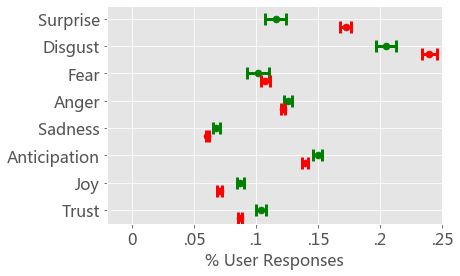

In [37]:
ax = plt.subplot(111)
formatter = plt.FuncFormatter(no_zero)
ax.xaxis.set_major_formatter(formatter)
offset=0
for veracity in ['TRUE','FALSE']:
    emotion2percs=veracity2emotion2scores[veracity]
    means=[]
    errors=[]
    for emotion in ['trust','joy','anticipation','sadness','anger','fear','disgust','surprise']:
        percs=emotion2percs[emotion]
        ##Robust SEM##
        clusters=veracity2clusters_emotion[veracity]
        y_r=percs
        robust_sem=calc_robust_sem(y_r,clusters)
        ####
        means.append(np.mean(percs))
        errors.append(robust_sem)
    means=np.array(means)
    errors=np.array(errors)
    y=[0+offset,1+offset,2+offset,3+offset,4+offset,5+offset,6+offset,7+offset]
    offset-=0.30
    ax.scatter(means,y,s=50,color=veracity2color[veracity])
    ax.errorbar(means, y, xerr=errors,fmt='.',color=veracity2color[veracity],elinewidth=3,capsize=6,capthick=3)

labels = ['Trust','Joy','Anticipation','Sadness','Anger','Fear','Disgust','Surprise']
plt.yticks([0,1,2,3,4,5,6,7], labels,fontsize=16)
plt.xlabel("% User Responses",fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.ylim([-.51,7.45])
plt.xlim([-.02,.25])
plt.show()



In [38]:
table=[]
for emotion in reversed(['trust','joy','anticipation','sadness','anger','fear','disgust','surprise']):
    D,p=stats.ks_2samp(veracity2emotion2scores['FALSE'][emotion],veracity2emotion2scores['TRUE'][emotion])
    row=[np.mean(veracity2emotion2scores['FALSE'][emotion]),np.mean(veracity2emotion2scores['TRUE'][emotion]),
         np.var(veracity2emotion2scores['FALSE'][emotion]),np.var(veracity2emotion2scores['TRUE'][emotion]),
         D,p]
    table.append(np.array(row))
table=np.array(table)
table=pd.DataFrame(table,reversed(['trust','joy','anticipation','sadness','anger','fear','disgust','surprise']),
                   ["mean-false","mean-true","var-false","var-true","D","p"])
print(table)

              mean-false  mean-true  var-false  var-true         D  \
surprise        0.172242   0.116041   0.016679  0.007150  0.205122   
disgust         0.239698   0.204867   0.025972  0.022685  0.101802   
fear            0.107640   0.101635   0.012021  0.009483  0.020506   
anger           0.121961   0.125505   0.007361  0.011133  0.023370   
sadness         0.060692   0.068128   0.003802  0.006485  0.036968   
anticipation    0.139764   0.149908   0.009270  0.015432  0.037918   
joy             0.070794   0.087440   0.005396  0.010399  0.060542   
trust           0.087210   0.104074   0.005835  0.011908  0.060322   

                          p  
surprise      1.769025e-108  
disgust        4.851528e-27  
fear           1.663145e-01  
anger          7.914851e-02  
sadness        6.185239e-04  
anticipation   4.061394e-04  
joy            7.727635e-10  
trust          9.045001e-10  
